![miad4.png](Archivos/miad4.png)

# Laboratorio 2

## Desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Para el desarrollo de esta actividad puedes utilizar cualquier librería externa. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos utilizando métodos de librerías especializadas.
3. Explorar, modificar, limpiar y unir objetos tablas de datos.
4. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
5. Implementar análisis basado en modelos estadísticos o de *machine learning*.

##  Contexto: desigualdad y factores de éxito en pruebas Saber 11 en Colombia

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas Saber 11, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (ej., matemáticas, física, inglés, etc.) y se lleva a cabo dos veces al año, ajustándose a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes diligencian un formulario que recoge información sociodemográfica y relacionada con la institución a la que pertenecen. El fin es obtener información con respecto al desempeño de los estudiantes en la prueba y de sus características.

![msaberpro.png](Archivos/saberpro.png)

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es la desigualdad y factores de éxito en las pruebas Saber 11.

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber 11, generar un reporte acerca de sus características principales y seleccionar las partes de dicho contenido que podrían ser relevantes para el análisis.


* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones y estadísticas descriptivas.


* Proponer un modelo que busque relacionar las variables de interés con el desempeño de los estudiantes y concluir acerca de los posibles hallazgos que se podrían reportar para el *stakeholder*.


* Generar una herramienta que permita a un usuario interactuar con alguno de los parámetros del análisis realizado de forma relevante en el contexto del problema.

# Fase 1: obtener e inspeccionar archivos

En esta fase te harás una idea general del contenido de los datos y generarás un reporte al respecto (ej., imprimiendo mensajes, presentando tablas de resumen, etc.). Además, seleccionarás un segmento de los datos que consideres útil para realizar tu análisis.

Pautas generales:

* Utilizar una librería especializada para leer los archivos de datos y agregarlos según sea necesario (ej., utilizando los métodos `append` o `concat` si eliges cargarlos utilizando la librería `pandas`).
* Inspeccionar el archivo a partir de sus encabezados, columnas y descripciones de las variables según su tipo (ej., numéricas, categóricas).
* Declarar una estructura de datos (ej., una lista) para almacenar un subconjunto de variables que puedan ser relevantes para la problemática de interés.

Preguntas guía:

* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Qué planteas para manejarlos?

In [ ]:
# Implementa tu respuesta en esta celda
import pandas as pd
import requests
request = requests.Session()

number_of_rows = 1150000 # Seleccionamos las 600,000 filas de todas las filas
rows_max = 7110000 # Maximo Numero de filas.


url = f'https://www.datos.gov.co/resource/kgxf-xxbe.json?$limit={number_of_rows}&$offset=150' # seleccionamos la base de datos con Datos de 2010 hasta 2020
request.get(url)
df = pd.read_json(url)


In [ ]:
# Librerias de los datos
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Mis columnas del archivo
df.columns

Index(['periodo', 'estu_tipodocumento', 'estu_consecutivo',
       'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
       'cole_caracter', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede',
       'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion',
       'cole_codigo_icfes', 'cole_depto_ubicacion', 'cole_genero',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_nombre_establecimiento', 'cole_nombre_sede',
       'cole_sede_principal', 'estu_cod_depto_presentacion',
       'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto',
       'estu_cod_reside_mcpio', 'estu_depto_presentacion', 'estu_depto_reside',
       'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento',
       'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside',
       'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_perso

In [ ]:
print(f'La cantidad de datos son: {len(df["periodo"])}')

La cantidad de datos son: 150000


### Las variables a utilizar son principalmente datos sociodemograficas y los resultado del Icfes,

* Variables objetivo: 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                  'punt_c_naturales', 'punt_lectura_critica', 'punt_global',

In [ ]:
variables_usar = ['periodo', 'cole_bilingue', 'cole_caracter', 'cole_depto_ubicacion', 'cole_genero', 'cole_mcpio_ubicacion', 'estu_fechanacimiento', 'estu_genero', 'estu_nacionalidad', 'fami_cuartoshogar',
                  'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador', 'fami_tieneinternet', 'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
                  'punt_c_naturales', 'punt_lectura_critica', 'punt_global', 'cole_area_ubicacion', 'cole_jornada', 'fami_tienelavadora']
df_estudios = df[variables_usar] # Variales que utilizaremos para el analisis
df_estudios.iloc[:1,:].transpose()

0
periodo                                                20172
cole_bilingue                                              N
cole_caracter                                      ACADÉMICO
cole_depto_ubicacion                               ANTIOQUIA
cole_genero                                            MIXTO
cole_mcpio_ubicacion                                 SEGOVIA
estu_fechanacimiento                              28/02/2001
estu_genero                                                F
estu_nacionalidad                                   COLOMBIA
fami_cuartoshogar                                        Dos
fami_educacionmadre       Secundaria (Bachillerato) completa
fami_educacionpadre       Secundaria (Bachillerato) completa
fami_estratovivienda                               Estrato 1
fami_personashogar                                     3 a 4
fami_tieneautomovil                                       No
fami_tienecomputador                                      Si
fami_tieneinternet                                        Si
punt_ingles                                             39.0
punt_matematicas                                        50.0
punt_sociales_ciudadanas                                48.0
punt_c_naturales                                        56.0
punt_lectura_critica                                    53.0
punt_global                                            254.0
cole_area_ubicacion                                   URBANO
cole_jornada                                           TARDE
fami_tienelavadora                                        Si

### Se realiza el filtro del Dataframe para no tener punt_global que sean iguales a cero, ya que no tiene sentido utilizarlas
La probabilidad de tener un estudiante con cero puntos no es lo mejor
Los datos de resultado de las materias si pueden contener valores en cero si los estudiantes no completaron la sección (por falta de tiempo o desconocimiento por ejemplo en inglés)

In [ ]:
df_estudios.fillna(0, inplace=True)
df_estudios = df_estudios[df_estudios['punt_global']!=0]
print('El número de filas luego de limpiar los valores en blanco del puntaje global es')
print(df_estudios['punt_global'].size)

print(f'El número de columnas es {len(variables_usar)}')

print('Los periodos a evaluar son')
print(sorted(df_estudios['periodo'].unique()))

#El tamaño de la muestra luego de limpiar los valores en blanco del puntaje global es 512.336 para cada Fila
#La cantidad de filas a utilizar son 24 columnas


El número de filas luego de limpiar los valores en blanco del puntaje global es
85209
El número de columnas es 26
Los periodos a evaluar son
[20142, 20151, 20152, 20161, 20162, 20171, 20172, 20181, 20191, 20194, 20201, 20211, 20224]


<ipython-input-431-8a09f56fbeba>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_estudios['cole_area_ubicacion'].unique()

array(['URBANO', 'RURAL'], dtype=object)

* Se realizará la limpieza de los datos, modificando las variables continuas para que sean homogeneas.
* Se homogenizarán las variables categoricas y discretas y se crearán dummies con las funciones gt_dummies o map para remplazar los valores actuales por nuevos y que sean reproducibles para el modelo de machine learning.

In [ ]:
#Limpieza de los datos convirtiendo dummies, nulos y asegurando trabajar con la mayor cantidad de variables.


df_estudios = df[variables_usar].copy() # Variales que utilizaremos para el analisis


#fami_personashogar

mode_personas = df_estudios['fami_personashogar'] .mode()
df_estudios['fami_personashogar'].fillna(4, inplace=True)



dicc = {'3 a 4':4, 'Tres':3, 'Siete':7, '5 a 6':6, 'Cuatro':4, 'Seis':6, 'Cinco':5,
       '7 a 8':8, 'Dos':2, 'Ocho':8, 'Doce o más':12, 'Once':11, '1 a 2':2, '9 o más':9,
       'Una':1, 'Nueve':9, 'Diez':10}

df_estudios['fami_personashogar'] = df_estudios['fami_personashogar'].map(dicc) #Map para convertir personas en el Hogar
df_estudios.loc[df_estudios['fami_personashogar'].isnull(), 'fami_personashogar'] = 3

#dicc_estrato

mode_personas = df_estudios['fami_estratovivienda'] .mode()
df_estudios['fami_estratovivienda'].fillna(3, inplace=True)

dicc_estrato ={'Estrato 1' :1, 'Estrato 2':2, 'Estrato 3':3, 'Estrato 4':4, 'Estrato 5':5, 0:0,
       'Sin Estrato':2, 'Estrato 6':6} #Se catalogara a las personas sin estrato como estrato 7 solo para tener un indice numeico y diferenciarlas del resto

df_estudios['fami_estratovivienda'] = df_estudios['fami_estratovivienda'].map(dicc_estrato) #Map para convertir Eel estarto
df_estudios.loc[df_estudios['fami_estratovivienda'].isna(), 'fami_estratovivienda'] = 2

#Automovil
df_estudios['fami_tieneautomovil'].fillna(0, inplace=True)
df_estudios['fami_tieneautomovil'] = df_estudios['fami_tieneautomovil'].map({'Si':1, 'No':0, 0:0})

#Colegio Bilingue
df_estudios['cole_bilingue'].fillna(0, inplace=True)
df_estudios['cole_bilingue']  = df_estudios['cole_bilingue'].map({'N': 0, 'S': 1, 0: 0 })

#Computador
df_estudios['fami_tienecomputador'].fillna(0, inplace=True)
df_estudios['fami_tienecomputador']  = df_estudios['fami_tienecomputador'].map({'No': 0, 'Si': 1, 0: 0 })

#Internet
df_estudios['fami_tieneinternet'].fillna(0, inplace=True)
df_estudios['fami_tieneinternet']  = df_estudios['fami_tieneinternet'].map({'No': 0, 'Si': 1, 0: 0 })

#Genero
df_estudios['estu_genero'].fillna(0, inplace=True)
df_estudios['estu_genero']  = df_estudios['estu_genero'].map({'F': 0, 'M': 1, 0: 0 })

#Cuartos Hogar

df_estudios['fami_cuartoshogar'].fillna(3, inplace=True)
dicc_cuartos = {'Dos':2, 'Cuatro':3, 'Uno':1, 'Tres':3, 'Cinco':5, 'Diez o más':10, 'Ocho':8,
       'Seis':6, 'Seis o mas':6, 'Siete':7, 'Nueve':9, 'nan': 3}

df_estudios['fami_cuartoshogar']  = df_estudios['fami_cuartoshogar'] .map(dicc_cuartos)

df_estudios.loc[df_estudios['fami_cuartoshogar'].isna(), 'fami_cuartoshogar'] = 3

#Departamento

#Ajustar depto Bogotá
df_estudios.loc[df_estudios['cole_depto_ubicacion'] == 'BOGOTÁ', 'cole_depto_ubicacion'] = 'BOGOTA'

mode_ubicacion = df_estudios['cole_depto_ubicacion'].mode()
mode_ubicacion

df_estudios.loc[df_estudios['cole_depto_ubicacion'].isna(), 'cole_depto_ubicacion'] = mode_ubicacion

df_dummies = pd.get_dummies(df_estudios['cole_depto_ubicacion'], prefix='depto', dtype = float )
df_dummies
df_estudios = pd.concat([df_estudios, df_dummies], axis=1)

df_estudios

#Educación Padre

mode_edu = df_estudios['fami_educacionpadre'].mode()
mode_edu

df_estudios.loc[df_estudios['fami_educacionpadre'].isna(), 'fami_educacionpadre'] = mode_edu

df_dummies_udupadre = pd.get_dummies(df_estudios['fami_educacionpadre'], prefix='EduPadre', dtype = float )
df_estudios = pd.concat([df_estudios, df_dummies_udupadre], axis=1)

df_dummies_udupadre


#Educación Padre

mode_eduMad = df_estudios['fami_educacionmadre'].mode()
mode_eduMad

df_estudios.loc[df_estudios['fami_educacionmadre'].isna(), 'fami_educacionmadre'] = mode_eduMad

df_dummies_uduMadre = pd.get_dummies(df_estudios['fami_educacionmadre'], prefix='EduMadre', dtype = float )
df_estudios = pd.concat([df_estudios, df_dummies_uduMadre], axis=1)

#Colegio Genero

mode_Cgenero =  df_estudios['cole_genero'].mode()
df_estudios.loc[df_estudios['cole_genero'].isna(), 'cole_genero'] = 'MIXTO'

df_dummies_Cgenero  = pd.get_dummies(df_estudios['cole_genero'], prefix='Cgenero', dtype = float )
df_estudios = pd.concat([df_estudios, df_dummies_Cgenero ], axis=1)

df_dummies_Cgenero

#Colegio caracter

mode_Ccaracter=  df_estudios['cole_caracter'].mode()
df_estudios.loc[df_estudios['cole_caracter'].isna(), 'cole_caracter'] = 'ACADÉMICO'

df_dummies_Ccaracter  = pd.get_dummies(df_estudios['cole_caracter'], prefix='Ccaracter', dtype = float )
df_estudios = pd.concat([df_estudios, df_dummies_Ccaracter ], axis=1)

df_dummies_Ccaracter

#Colegio area_ubicacion

mode_Ccaracter=  df_estudios['cole_area_ubicacion'].mode()
df_estudios.loc[df_estudios['cole_area_ubicacion'].isna(), 'cole_area_ubicacion'] = 'URBANO'

df_dummies_Ccarea   = pd.get_dummies(df_estudios['cole_area_ubicacion'], prefix='carea', dtype = float )
df_estudios = pd.concat([df_estudios, df_dummies_Ccarea ], axis=1)

df_dummies_Ccarea

#Automovil

df_estudios['fami_tienelavadora'].fillna(0, inplace=True)
df_estudios['fami_tienelavadora'] = df_estudios['fami_tienelavadora'].map({'Si':1,  0:1, 'No':0})



#'cole_area_ubicacion', 'cole_jornada', 'fami_tienelavadora'






<ipython-input-433-6ca3d22a7b52>:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-433-6ca3d22a7b52>:24: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

In [ ]:
#tipo de variables

categorical_vars = ['cole_bilingue', 'cole_caracter', 'cole_depto_ubicacion',
       'cole_genero',
       'estu_genero', 'estu_nacionalidad', 'fami_cuartoshogar',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
       'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneinternet', 'fami_tienelavadora', 'cole_area_ubicacion']

var_numericas = [ 'punt_ingles',
       'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales',
       'punt_lectura_critica', 'punt_global']

In [ ]:
# Eliminamos los valores con un puntaje de cero global ya que no es representativo para el ejercicio
df_estudios = df_estudios[df_estudios['punt_global']>0]
df_estudios


periodo  cole_bilingue      cole_caracter cole_depto_ubicacion  \
0         20172              0          ACADÉMICO            ANTIOQUIA   
1         20142              0  TÉCNICO/ACADÉMICO            ATLANTICO   
15        20172              0          ACADÉMICO            ANTIOQUIA   
17        20152              0          ACADÉMICO            RISARALDA   
18        20152              0  TÉCNICO/ACADÉMICO            SANTANDER   
...         ...            ...                ...                  ...   
149991    20194              0          ACADÉMICO                VALLE   
149993    20172              0  TÉCNICO/ACADÉMICO                HUILA   
149994    20142              0          ACADÉMICO                CAUCA   
149996    20152              0            TÉCNICO                VALLE   
149998    20152              0          ACADÉMICO         CUNDINAMARCA   

       cole_genero cole_mcpio_ubicacion estu_fechanacimiento  estu_genero  \
0            MIXTO              SEGOVIA           28/02/2001            0   
1            MIXTO          SABANALARGA           17/01/1998            1   
15           MIXTO              COCORNA           28/07/2000            0   
17           MIXTO        DOS QUEBRADAS           24/11/1997            0   
18           MIXTO          BUCARAMANGA           03/07/1998            0   
...            ...                  ...                  ...          ...   
149991       MIXTO         BUENAVENTURA           19/03/1990            1   
149993       MIXTO                 HOBO           11/07/1997            1   
149994       MIXTO              POPAYAN           05/02/1998            1   
149996       MIXTO                YUMBO           16/01/1998            1   
149998       MIXTO            CAPARRAPI           03/07/1998            0   

       estu_nacionalidad  fami_cuartoshogar  ...  \
0               COLOMBIA                2.0  ...   
1               COLOMBIA                2.0  ...   
15              COLOMBIA                3.0  ...   
17              COLOMBIA                3.0  ...   
18              COLOMBIA                3.0  ...   
...                  ...                ...  ...   
149991          COLOMBIA                2.0  ...   
149993          COLOMBIA                2.0  ...   
149994          COLOMBIA                5.0  ...   
149996          COLOMBIA                2.0  ...   
149998          COLOMBIA                3.0  ...   

       EduMadre_Técnica o tecnológica incompleta Cgenero_FEMENINO  \
0                                            0.0              0.0   
1                                            0.0              0.0   
15                                           0.0              0.0   
17                                           0.0              0.0   
18                                           0.0              0.0   
...                                          ...              ...   
149991                                       0.0              0.0   
149993                                       0.0              0.0   
149994                                       0.0              0.0   
149996                                       0.0              0.0   
149998                                       0.0              0.0   

        Cgenero_MASCULINO  Cgenero_MIXTO  Ccaracter_ACADÉMICO  \
0                     0.0            1.0                  1.0   
1                     0.0            1.0                  0.0   
15                    0.0            1.0                  1.0   
17                    0.0            1.0                  1.0   
18                    0.0            1.0                  0.0   
...                   ...            ...                  ...   
149991                0.0            1.0                  1.0   
149993                0.0            1.0                  0.0   
149994                0.0            1.0                  1.0   
149996                0.0            1.0                  0.0   
149998                0.0

In [ ]:
#Eliminación de Outliers por rango interquartile

def remove_outliers_iqr(df, column):

  Q1 = df[column].quantile(0.10)  # Calcular el primer cuartil
  Q3 = df[column].quantile(0.90)  # Calcular el tercer cuartil
  IQR = Q3 - Q1  # Calcular el IQR
  lower_bound = Q1 - 1.5 * IQR  # Calcular el límite inferior
  upper_bound = Q3 + 1.5 * IQR  # Calcular el límite superior
  df_estudios = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]  # Filtrar el DataFrame



remove_outliers_iqr(df_estudios, 'punt_global')
remove_outliers_iqr(df_estudios, 'punt_ingles')
remove_outliers_iqr(df_estudios, 'punt_matematicas')
remove_outliers_iqr(df_estudios, 'punt_sociales_ciudadanas')
remove_outliers_iqr(df_estudios, 'punt_c_naturales')
remove_outliers_iqr(df_estudios, 'punt_lectura_critica')
remove_outliers_iqr(df_estudios, 'punt_global')


print(f"Tamaño después de eliminar outliers: {len(df_estudios)}")

Tamaño después de eliminar outliers: 85209


# Fase 2: identificar características y relaciones en las variables

En esta fase realizarás análisis descriptivo para identificar posibles patrones o relaciones entre las variables de interés para la problemática planteada. Además, expondrás estadísticas descriptivas y visualizaciones para concluir al respecto de los patrones y las relaciones identificadas. Finalmente, elegirás el segmento de los datos sobre el cual profundizarás con tu análisis (este puede ser, o no, igual al seleccionado anteriormente).

Pautas generales:

* Calcular estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable sociodemográfica relevante en el contexto del problema.
* Utilizar librerías especializadas (ej., `matplotlib`, `seaborn`, etc.) para inspeccionar visualmente variables de interés. Los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser útiles.
* Utilizar el método `groupby` de `pandas`, en conjunto con métodos de visualización, puede proveer evidencia del impacto de las variables sociodemográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:

* ¿Hay patrones de interés en las distribuciones de las variables o en las relaciones entre ellas?
* ¿Consideras que existe algún impacto significativo de variables sociodemográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables harías un análisis más profundo?

In [ ]:
df_estudios[var_numericas].describe().transpose()

count        mean        std   min    25%    50%  \
punt_ingles               85201.0   50.399150  12.307980   0.0   42.0   49.0   
punt_matematicas          85209.0   50.733209  11.926581   0.0   42.0   50.0   
punt_sociales_ciudadanas  85209.0   49.147050  11.628495   0.0   41.0   49.0   
punt_c_naturales          85209.0   50.402622  10.567857   0.0   43.0   50.0   
punt_lectura_critica      85209.0   51.952212  10.255659   0.0   45.0   52.0   
punt_global               85209.0  252.732176  49.848206  16.0  216.0  249.0   

                            75%    max  
punt_ingles                57.0  100.0  
punt_matematicas           59.0  100.0  
punt_sociales_ciudadanas   57.0  100.0  
punt_c_naturales           57.0  100.0  
punt_lectura_critica       59.0  100.0  
punt_global               286.0  471.0

* Podemos ver que los puntajes en matematicas, ingles  y ciencias naturales son homogeneos, por lo que las personas tienden a tener similares resultados

* El puntaje en Lectura critica esta por encima de las demás lo que indica que a los estudiantes les va bastante bien en esas áreas

*  El puntaje de socailes y ciudadanas es un poco más bajo en el promedio de los estudiantes, para mejorar los resultados de las personas podrían enfocarse en esa área.

* La variabilidad de los resultados muestran grandes diferencias entre los diferentes estudiantes, lo cual a priori podemos decir que se debe caracteristicas demograficas y de enseñanza.

* La desviación estandar más alta se centra en puntaje de inglés lo que nos muesta que las diferencias en el idioma son muy difeentes, lo que podemos decir que se debe al caracter bilingue o no del colegio.

In [ ]:
df_estudios[var_numericas].skew()

punt_ingles                 0.827442
punt_matematicas            0.286666
punt_sociales_ciudadanas    0.160285
punt_c_naturales            0.245241
punt_lectura_critica        0.123455
punt_global                 0.366208
dtype: float64

$$Skewness = (n / ((n - 1) * (n - 2))) * Σ[(xi - x̄) / s]^3$$
Donde:

n: Es el tamaño de la muestra (el número de datos).
xi: Es cada valor individual en la muestra.
x̄: Es la media de la muestra (el promedio de todos los valores).
s: Es la desviación estándar de la muestra.
Σ: Significa la suma de todos los valores.

* Podemos decir que la mayoria de las distribuciones de los puntajes son simetricos cercanos a cero, al ser positivo la cola de la distribución es a la derecha. (Puntajes mayormente bajos que puntajes altos)

* La distribución de los puntajes de ingles es más alto dde 0.82 indicando que hay muchos estudiantes con pntajes bajos y pocos con puntajes altos, indicando la desigualdad en esta rama (podríamos ver la posibilidad de normalizar este valor)

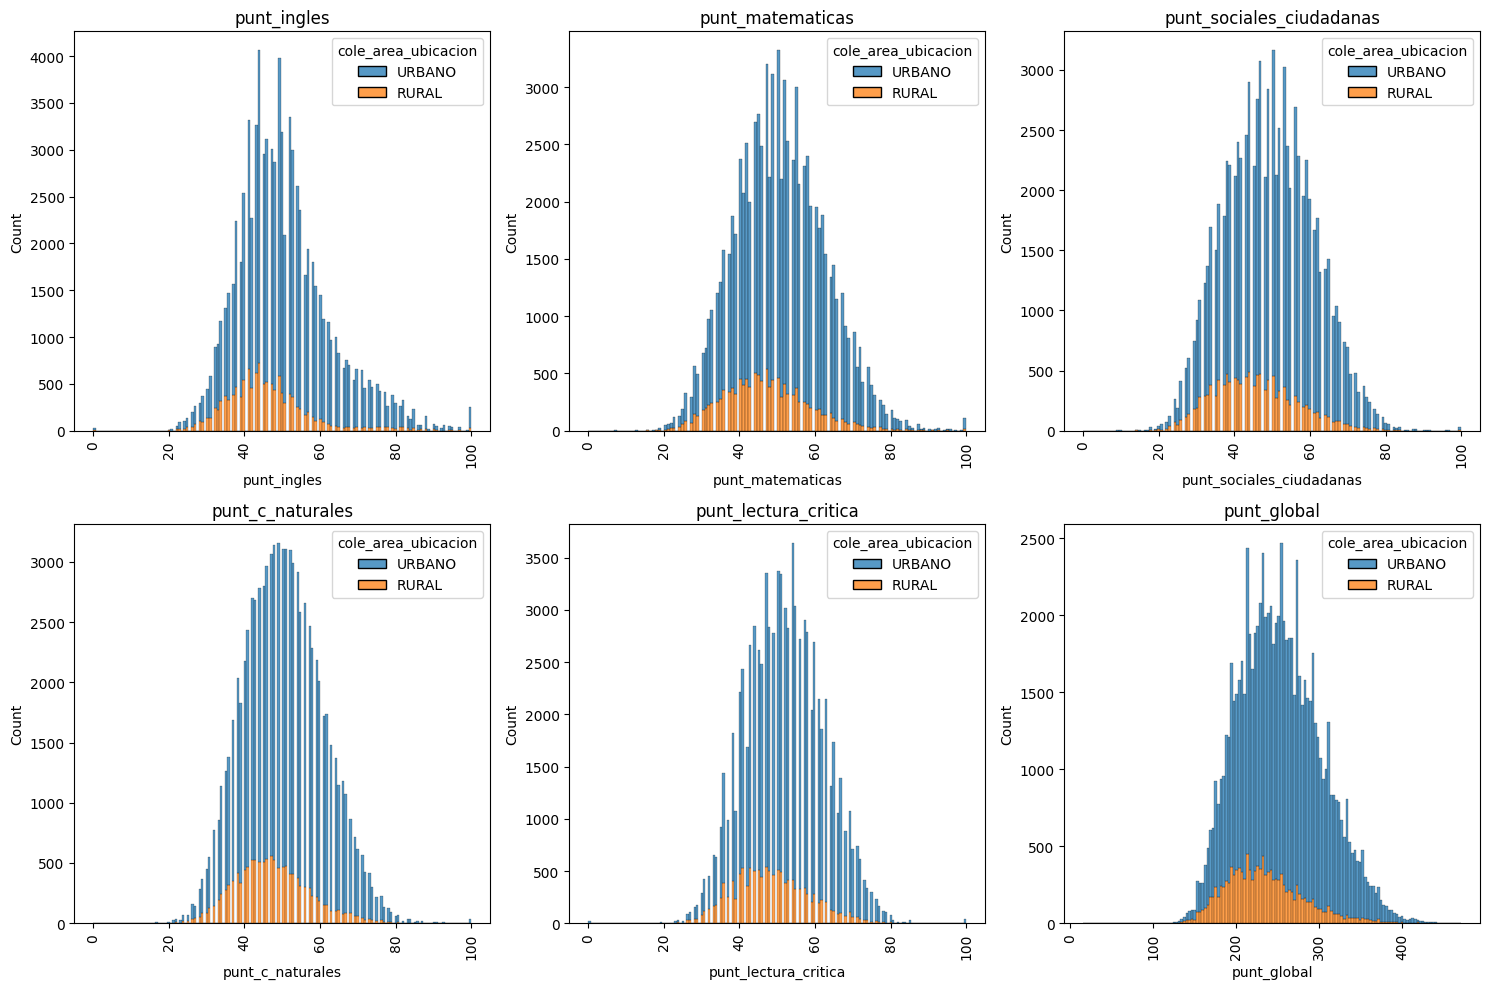

In [ ]:
n_cols = 3
n_rows = (len(var_numericas) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))  # Ajusta el figsize según la cantidad de gráficos

# Aplana el array de axes para iterar fácilmente
axes = axes.flatten()

for i, var in enumerate(var_numericas):
  sns.histplot(data=df_estudios, x=var, ax=axes[i], hue = df_estudios['cole_area_ubicacion'],multiple = "stack" )
  axes[i].set_title(var)
  axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad

# Ocultar los subplots vacíos si no hay suficientes variables para llenar la matriz
for j in range(i+1, len(axes)):
  axes[j].set_visible(False)

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

In [ ]:
import pandas as pd

# Asumiendo que 'df_estudios' es tu DataFrame y 'categorical_vars' es tu lista de variables categóricas

for var in categorical_vars:
  print(f"Tabla de Frecuencias para: {var}")
  tabla_frecuencias = df_estudios[var].value_counts(dropna=False)  # Incluye valores NaN
  tabla_porcentajes = df_estudios[var].value_counts(normalize=True, dropna=False) * 100  # Porcentajes

  tabla_combinada = pd.concat([tabla_frecuencias, tabla_porcentajes], axis=1)
  tabla_combinada.columns = ['Frecuencia', 'Porcentaje (%)']

  print(tabla_combinada)
  print("\n" + "-"*40 + "\n")  # Separador

Tabla de Frecuencias para: cole_bilingue
               Frecuencia  Porcentaje (%)
cole_bilingue                            
0                   83635       98.152777
1                    1574        1.847223

----------------------------------------

Tabla de Frecuencias para: cole_caracter
                   Frecuencia  Porcentaje (%)
cole_caracter                                
ACADÉMICO               47489       55.732376
TÉCNICO/ACADÉMICO       27972       32.827518
TÉCNICO                  9190       10.785246
NO APLICA                 558        0.654860

----------------------------------------

Tabla de Frecuencias para: cole_depto_ubicacion
                      Frecuencia  Porcentaje (%)
cole_depto_ubicacion                            
BOGOTA                     13729       16.112148
ANTIOQUIA                  11208       13.153540
VALLE                       7398        8.682181
CUNDINAMARCA                5635        6.613151
ATLANTICO                   4726        5.5463

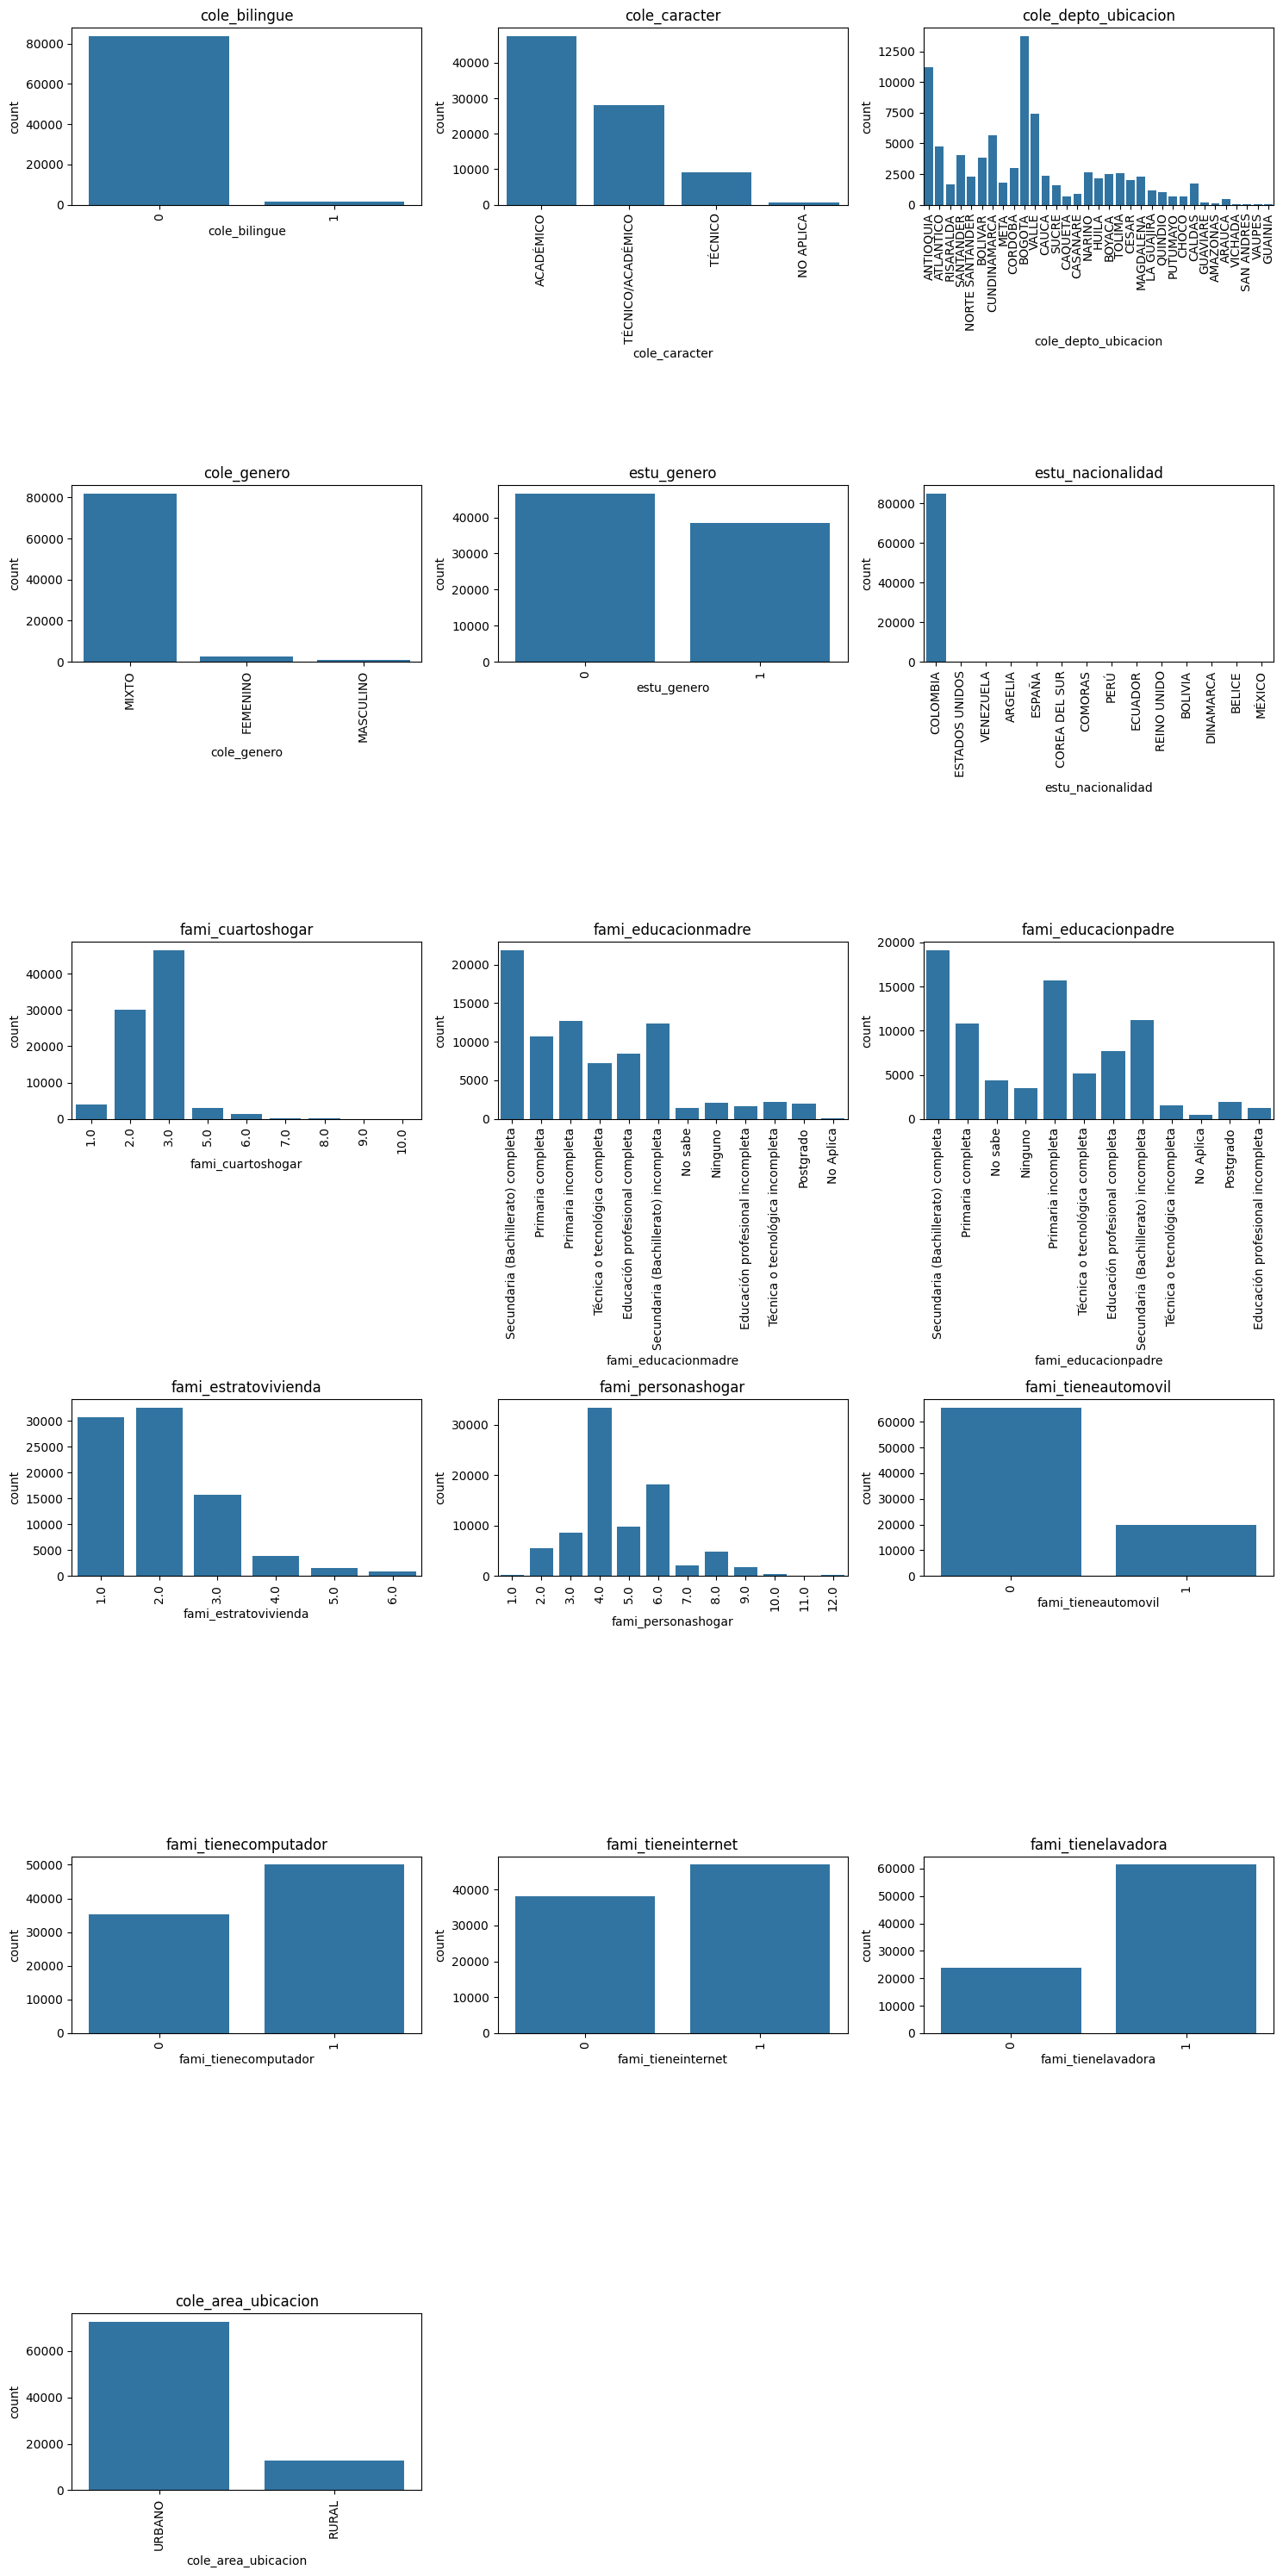

In [ ]:
n_cols = 3
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))  # Ajusta el figsize según la cantidad de gráficos

# Aplana el array de axes para iterar fácilmente
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
  sns.countplot(data=df_estudios, x=var, ax=axes[i])
  axes[i].set_title(var)
  axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad

# Ocultar los subplots vacíos si no hay suficientes variables para llenar la matriz
for j in range(i+1, len(axes)):
  axes[j].set_visible(False)

plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

* Las variables categoricas se graficaron con el metodo de countplot y se utilizo una tabla de frecuencias para saber la distribución de cada opción en las variables categorias.

* La variable area de ubicación muestra que la mayoria de los estudiantes estan en zonas urbanas con el 86%

* La mayoria de los colegios no son bilingues (98%) lo que llevaria a cabo la distibución desequilibrada del puntaje de inglés

* La mayoria de los estudiantes estan en bogotá y antioquia lo que significaría una distrubución desequilibrada entre estos estudiantes y otros de otros departamentos por el acceso a tecnologias

* El 54% de las personas son mujeres

* La mayoria de las personas tienen 3  cuartos lo que podria estar correlacionado con el nivel socioeconomico del estudiante

* La mayoria de los estudiantes pertenecen a nivel socioeconomico 1 y dos

*La mayoria de los estudiantes tienen  lavadora, pero no tienen internet , ni computador

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt

df_estudios['estu_fechanacimiento'] = pd.to_datetime(df_estudios['estu_fechanacimiento'], errors='coerce')
#df_estudios['edad'] =
df_estudios['estu_fechanacimiento'] = df_estudios['estu_fechanacimiento'].dt.strftime('%Y')
#mode = pd.DataFrame(df_estudios['estu_fechanacimiento']).mode()
#mode

#np.where(df_estudios['estu_fechanacimiento'].isna(), mode, df_estudios['estu_fechanacimiento'])

df_estudios['estu_fechanacimiento'].fillna(1995, inplace=True)


df_estudios['estu_fechanacimiento'].isna().sum()

df_estudios['estu_fechanacimiento']= df_estudios['estu_fechanacimiento'].astype(int)
df_estudios['edad'] = 2023 - df_estudios['estu_fechanacimiento']

df_estudios['edad'] = np.where(df_estudios['edad'] < 0, 0, df_estudios['edad'])
df_estudios['edad'].value_counts()

<ipython-input-442-9a154dc8b170>:4: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-442-9a154dc8b170>:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





edad
24    12660
25    12309
23    11568
21    11318
26     9961
      ...  
88        1
0         1
76        1
77        1
72        1
Name: count, Length: 75, dtype: int64

<Axes: xlabel='edad', ylabel='punt_global'>

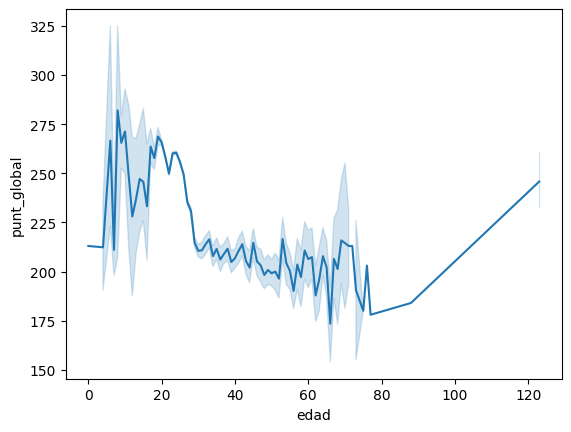

In [ ]:
df_estudios['edad'].value_counts()
sns.lineplot(data=df_estudios, x='edad', y='punt_global')

* Se creo otra caracteristica (edad) para ser tomada en cuenta en el modelo, más adelante se comprobará si es relevante en el modelo de regresión.

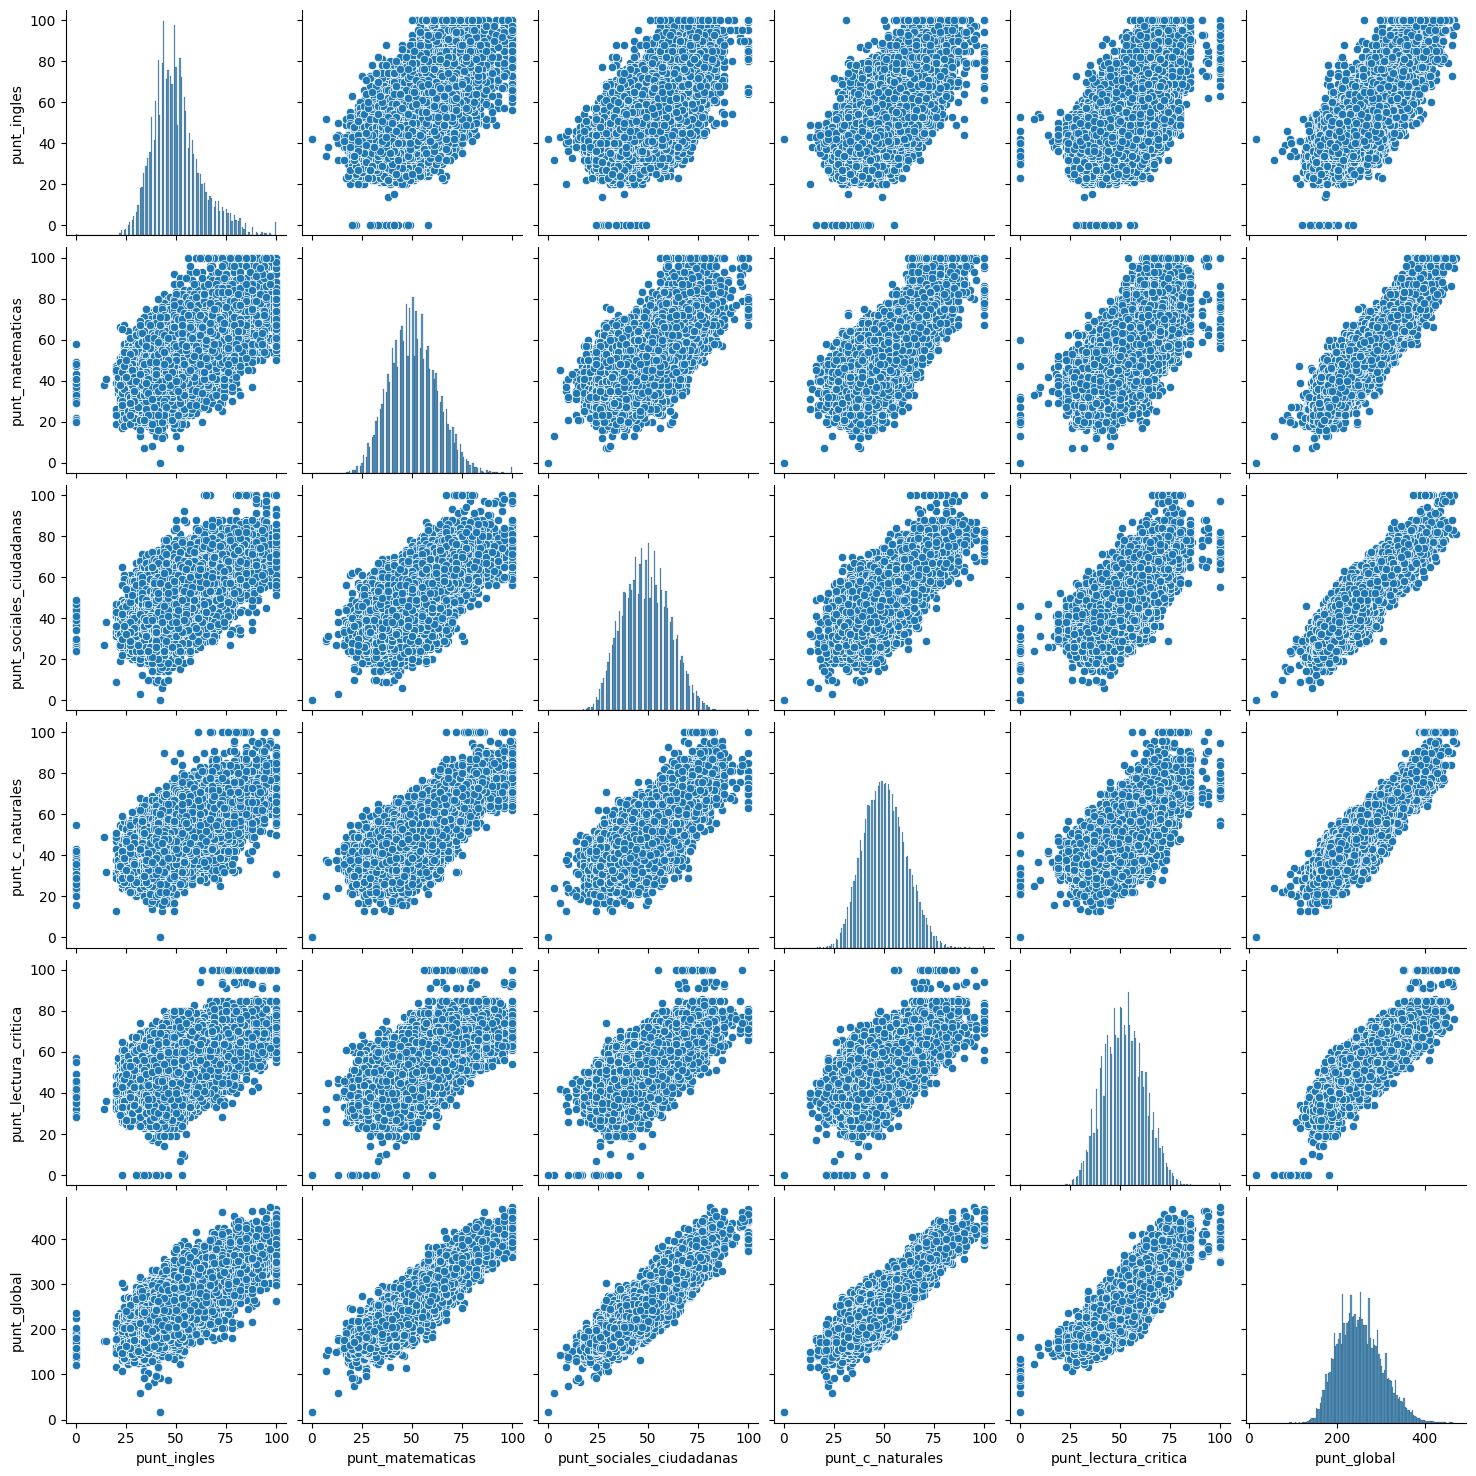

In [ ]:
sns.pairplot(df_estudios[[ 'punt_ingles',
       'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales',
       'punt_lectura_critica', 'punt_global']])
plt.show()

$$IG = (3 * Lectura crítica + 3 * Matemáticas + 3 * Ciencias Naturales + 3 * Sociales y ciudadanas + 1 * Inglés) / 13$$

* Los resultados globales de la prueba del icfes son sumas ponderadas de los valores obtenidos en cada asignatura.

* Se ve claramente la correlación entre cada puntaje y la variable global

* No se tomaran en cuenta ninguno de los puntajes en la regresión ya que estos valores solamente se obtendra en conjunto con los demás.

In [ ]:
var_numericas

['punt_ingles',
 'punt_matematicas',
 'punt_sociales_ciudadanas',
 'punt_c_naturales',
 'punt_lectura_critica',
 'punt_global']

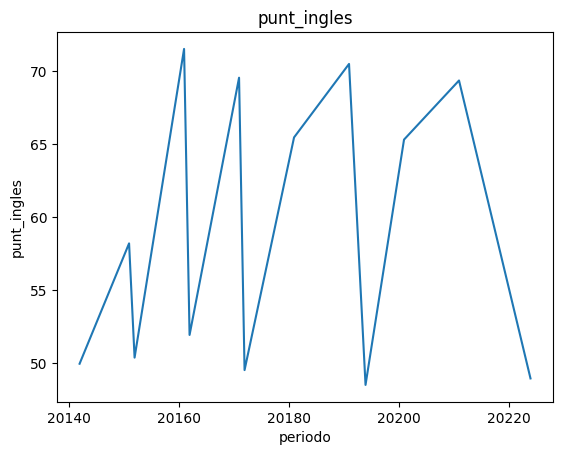

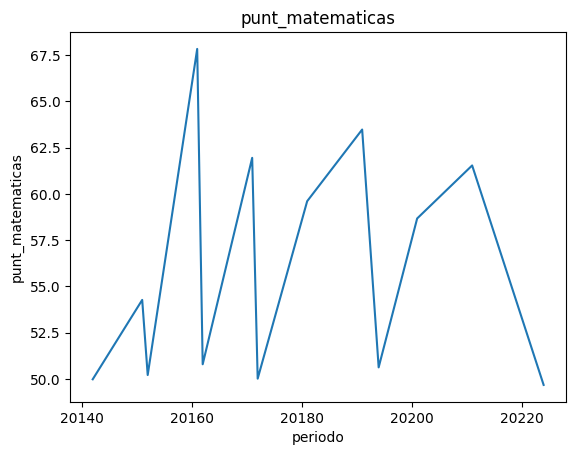

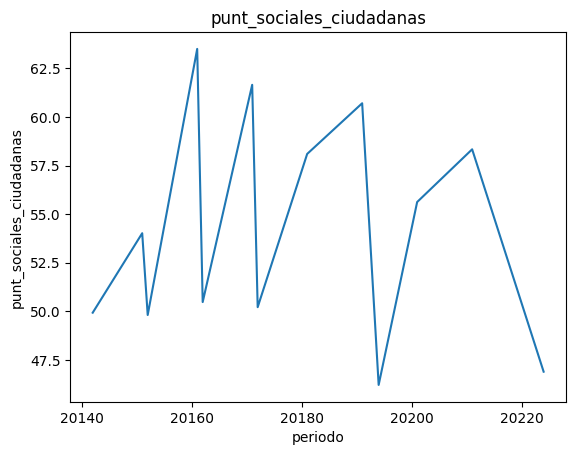

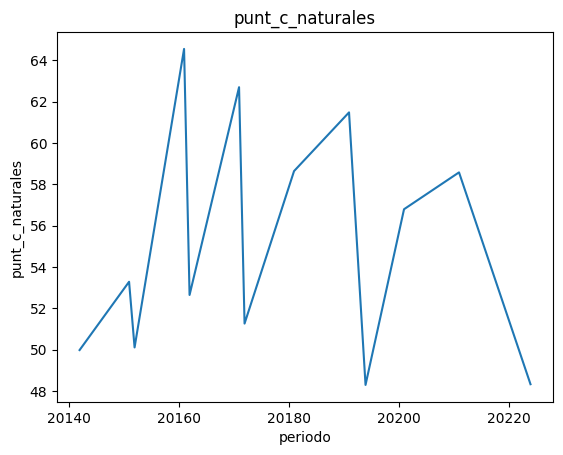

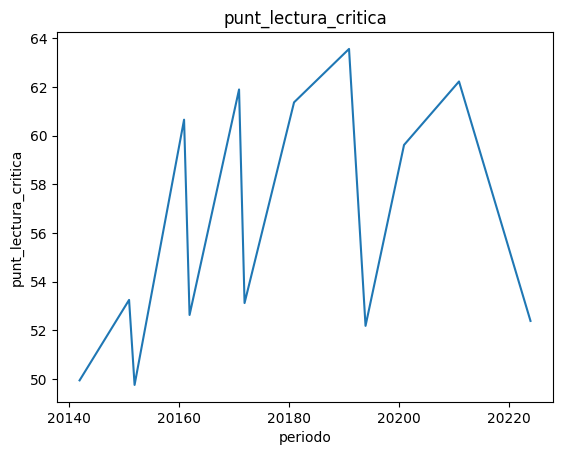

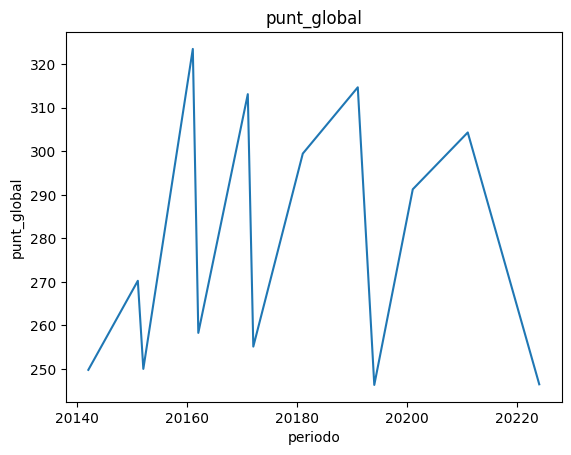

In [ ]:
df_resume = df_estudios[['periodo','punt_ingles',
 'punt_matematicas',
 'punt_sociales_ciudadanas',
 'punt_c_naturales',
 'punt_lectura_critica',
 'punt_global' ]].groupby(['periodo']).mean(var_numericas).sort_values('punt_global', ascending=False).reset_index()

for i in var_numericas:
  sns.lineplot(data=df_resume, x='periodo', y=i)
  plt.title(i)
  plt.show()

In [ ]:
df_resume

periodo  punt_ingles  punt_matematicas  punt_sociales_ciudadanas  \
0     20161    71.519108         67.834395                 63.496815   
1     20191    70.491349         63.477509                 60.702422   
2     20171    69.547486         61.946927                 61.650838   
3     20211    69.356771         61.536269                 58.334197   
4     20181    65.457921         59.603960                 58.096535   
5     20201    65.307882         58.669927                 55.623472   
6     20151    58.200622         54.269051                 54.020218   
7     20162    51.928472         50.790326                 50.480469   
8     20172    49.521126         50.013222                 50.217684   
9     20152    50.375429         50.208737                 49.814597   
10    20142    49.956348         49.977916                 49.932491   
11    20224    48.950311         49.673879                 46.899536   
12    20194    48.505456         50.622617                 46.218781   

    punt_c_naturales  punt_lectura_critica  punt_global  
0          64.547771             60.652866   323.512739  
1          61.477509             63.560554   314.695502  
2          62.695531             61.893855   313.120112  
3          58.575130             62.222798   304.323834  
4          58.637376             61.365099   299.469059  
5          56.792176             59.613692   291.268949  
6          53.283048             53.247278   270.247278  
7          52.644412             52.628728   258.283840  
8          51.260452             53.118851   255.136800  
9          50.105636             49.753914   250.011630  
10         49.978433             49.941207   249.786838  
11         48.326121             52.383308   246.469861  
12         48.292002             52.181050   246.327198

* Podemos ver que los años de los examenes los resultados son disparejos de acuerdo al promedio del puntaje observado
* En el año 2026, los puntajes de inglés y matematicas fueron muy superiores a los demas, igualmenete el puntaje global, fue mucho mejor en el año 2016
* Se observan picos en los cuales se puede ver que los valores de los periodos 1 son en promedio mayores que los de los periodos 2


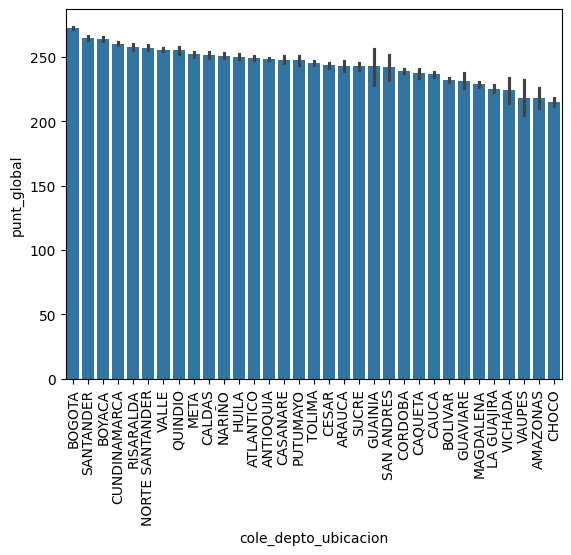

In [ ]:
order = df_estudios.groupby('cole_depto_ubicacion')['punt_global'].mean().sort_values(ascending=False).index

# Crea el barplot con el orden especificado
sns.barplot(data=df_estudios, x='cole_depto_ubicacion', y='punt_global', order=order)

plt.xticks(rotation=90)
plt.show()

In [ ]:
var_numericas

['punt_ingles',
 'punt_matematicas',
 'punt_sociales_ciudadanas',
 'punt_c_naturales',
 'punt_lectura_critica',
 'punt_global']

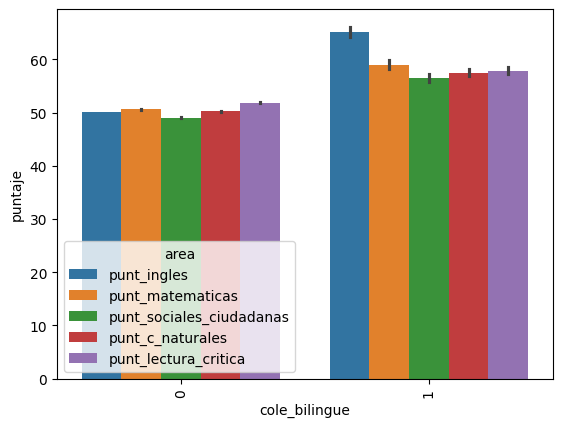

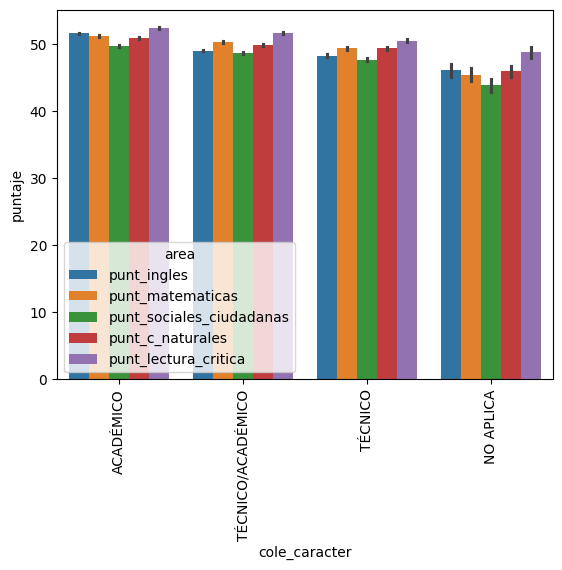

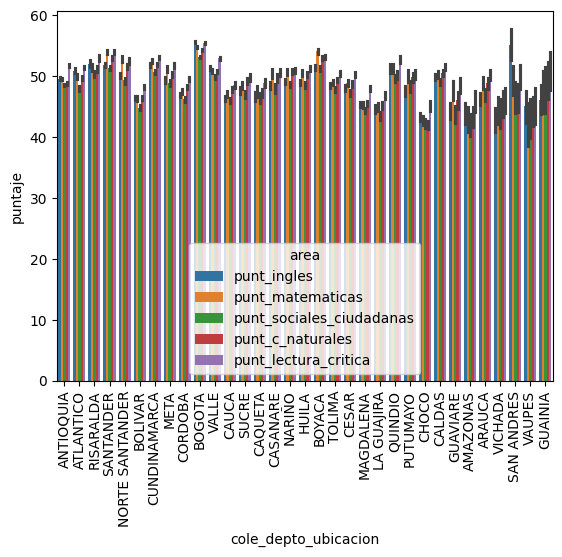

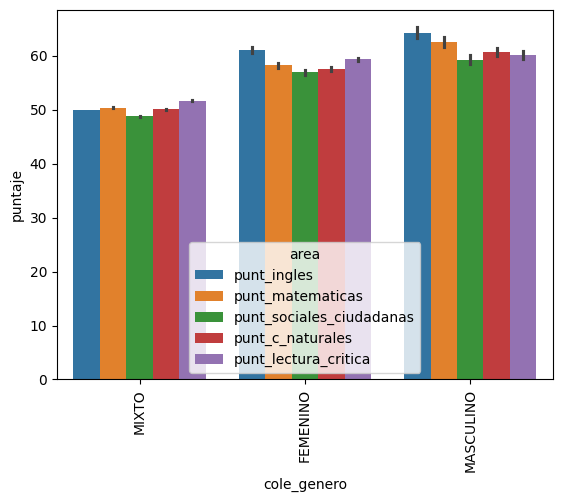

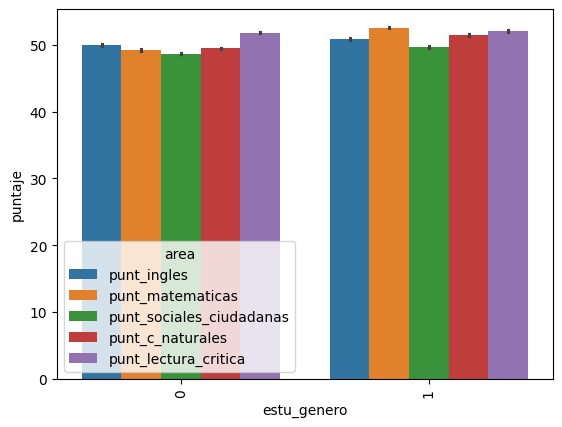

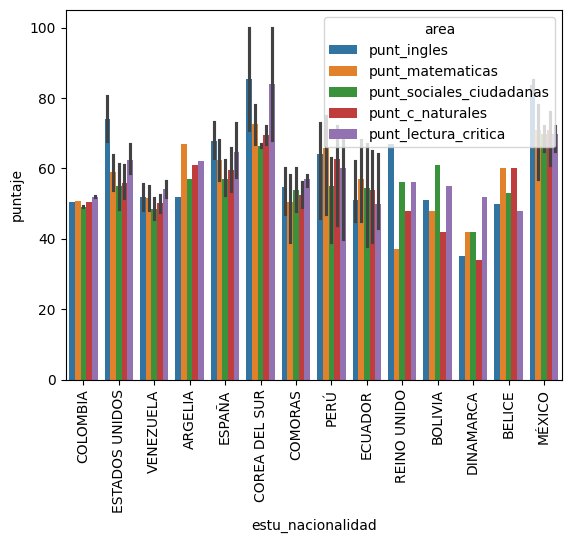

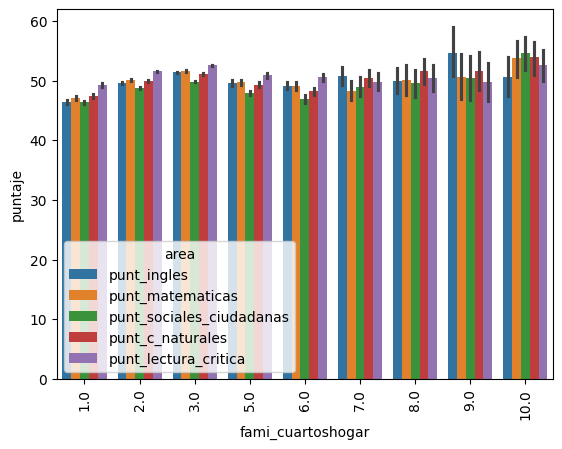

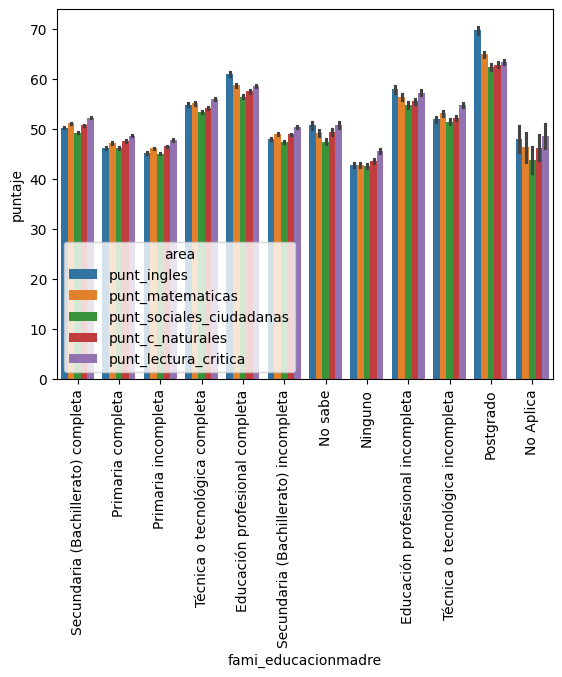

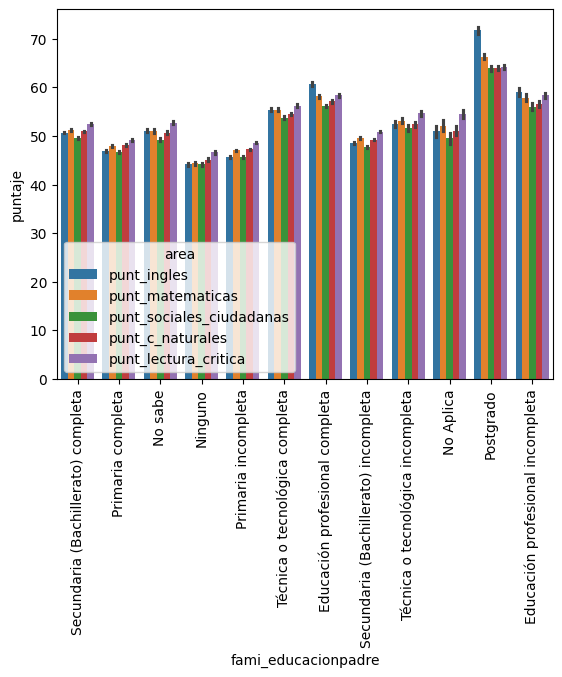

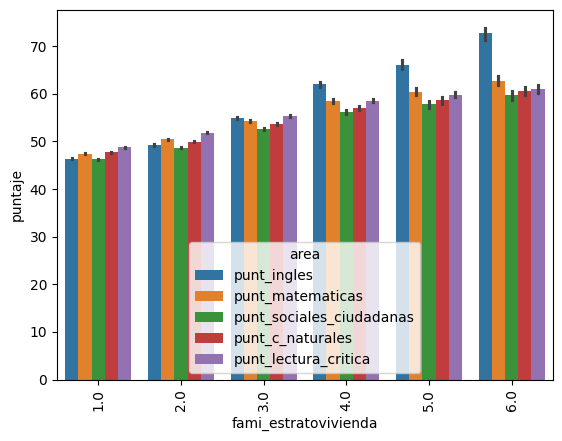

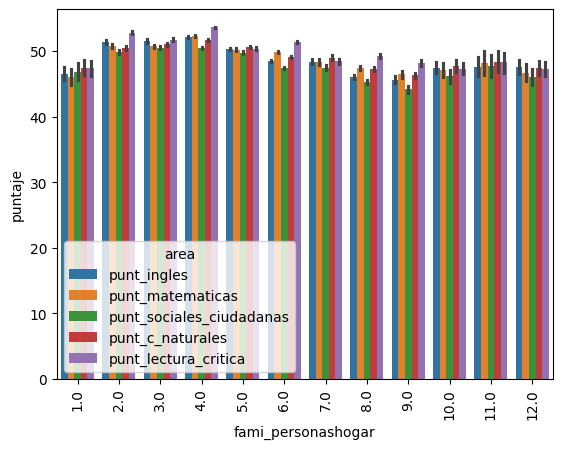

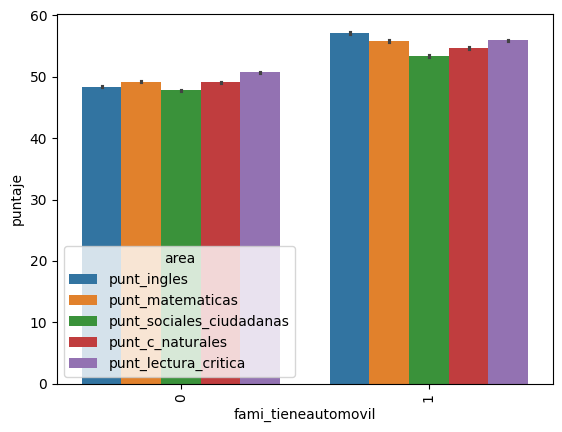

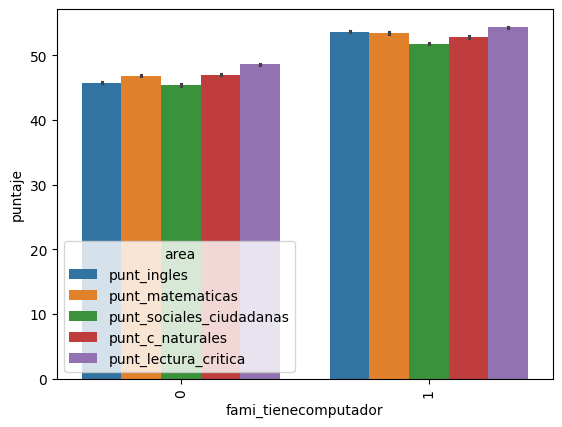

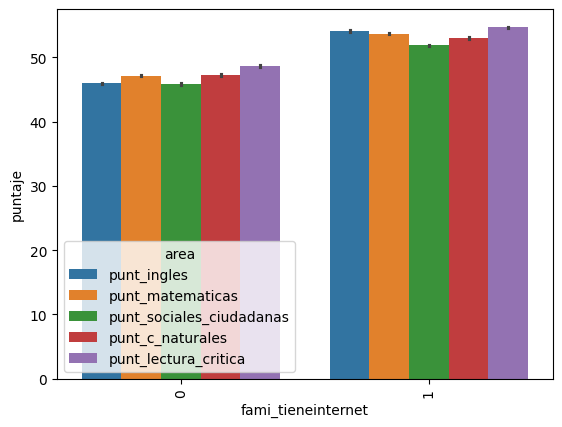

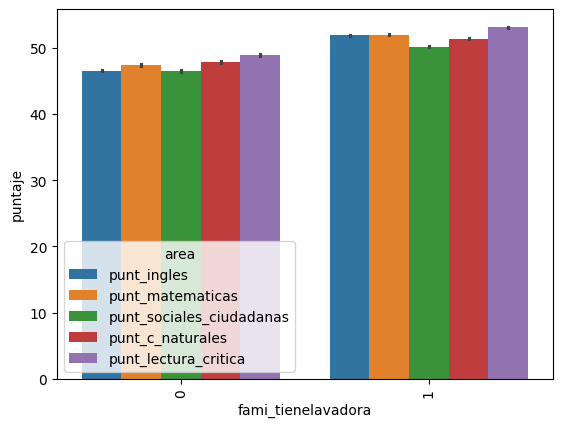

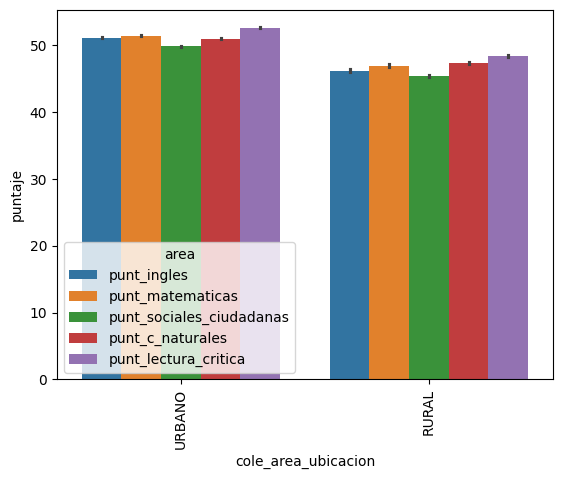

In [ ]:
var_numericas1 = ['punt_ingles',
 'punt_matematicas',
 'punt_sociales_ciudadanas',
 'punt_c_naturales',
 'punt_lectura_critica']
df_melted = pd.melt(df_estudios, id_vars=categorical_vars, value_vars=var_numericas1, var_name='area', value_name='puntaje')
df_melted
for i in categorical_vars:
  sns.barplot(data=df_melted, x=i, y='puntaje', hue='area')
  plt.xticks(rotation=90)
  plt.show()


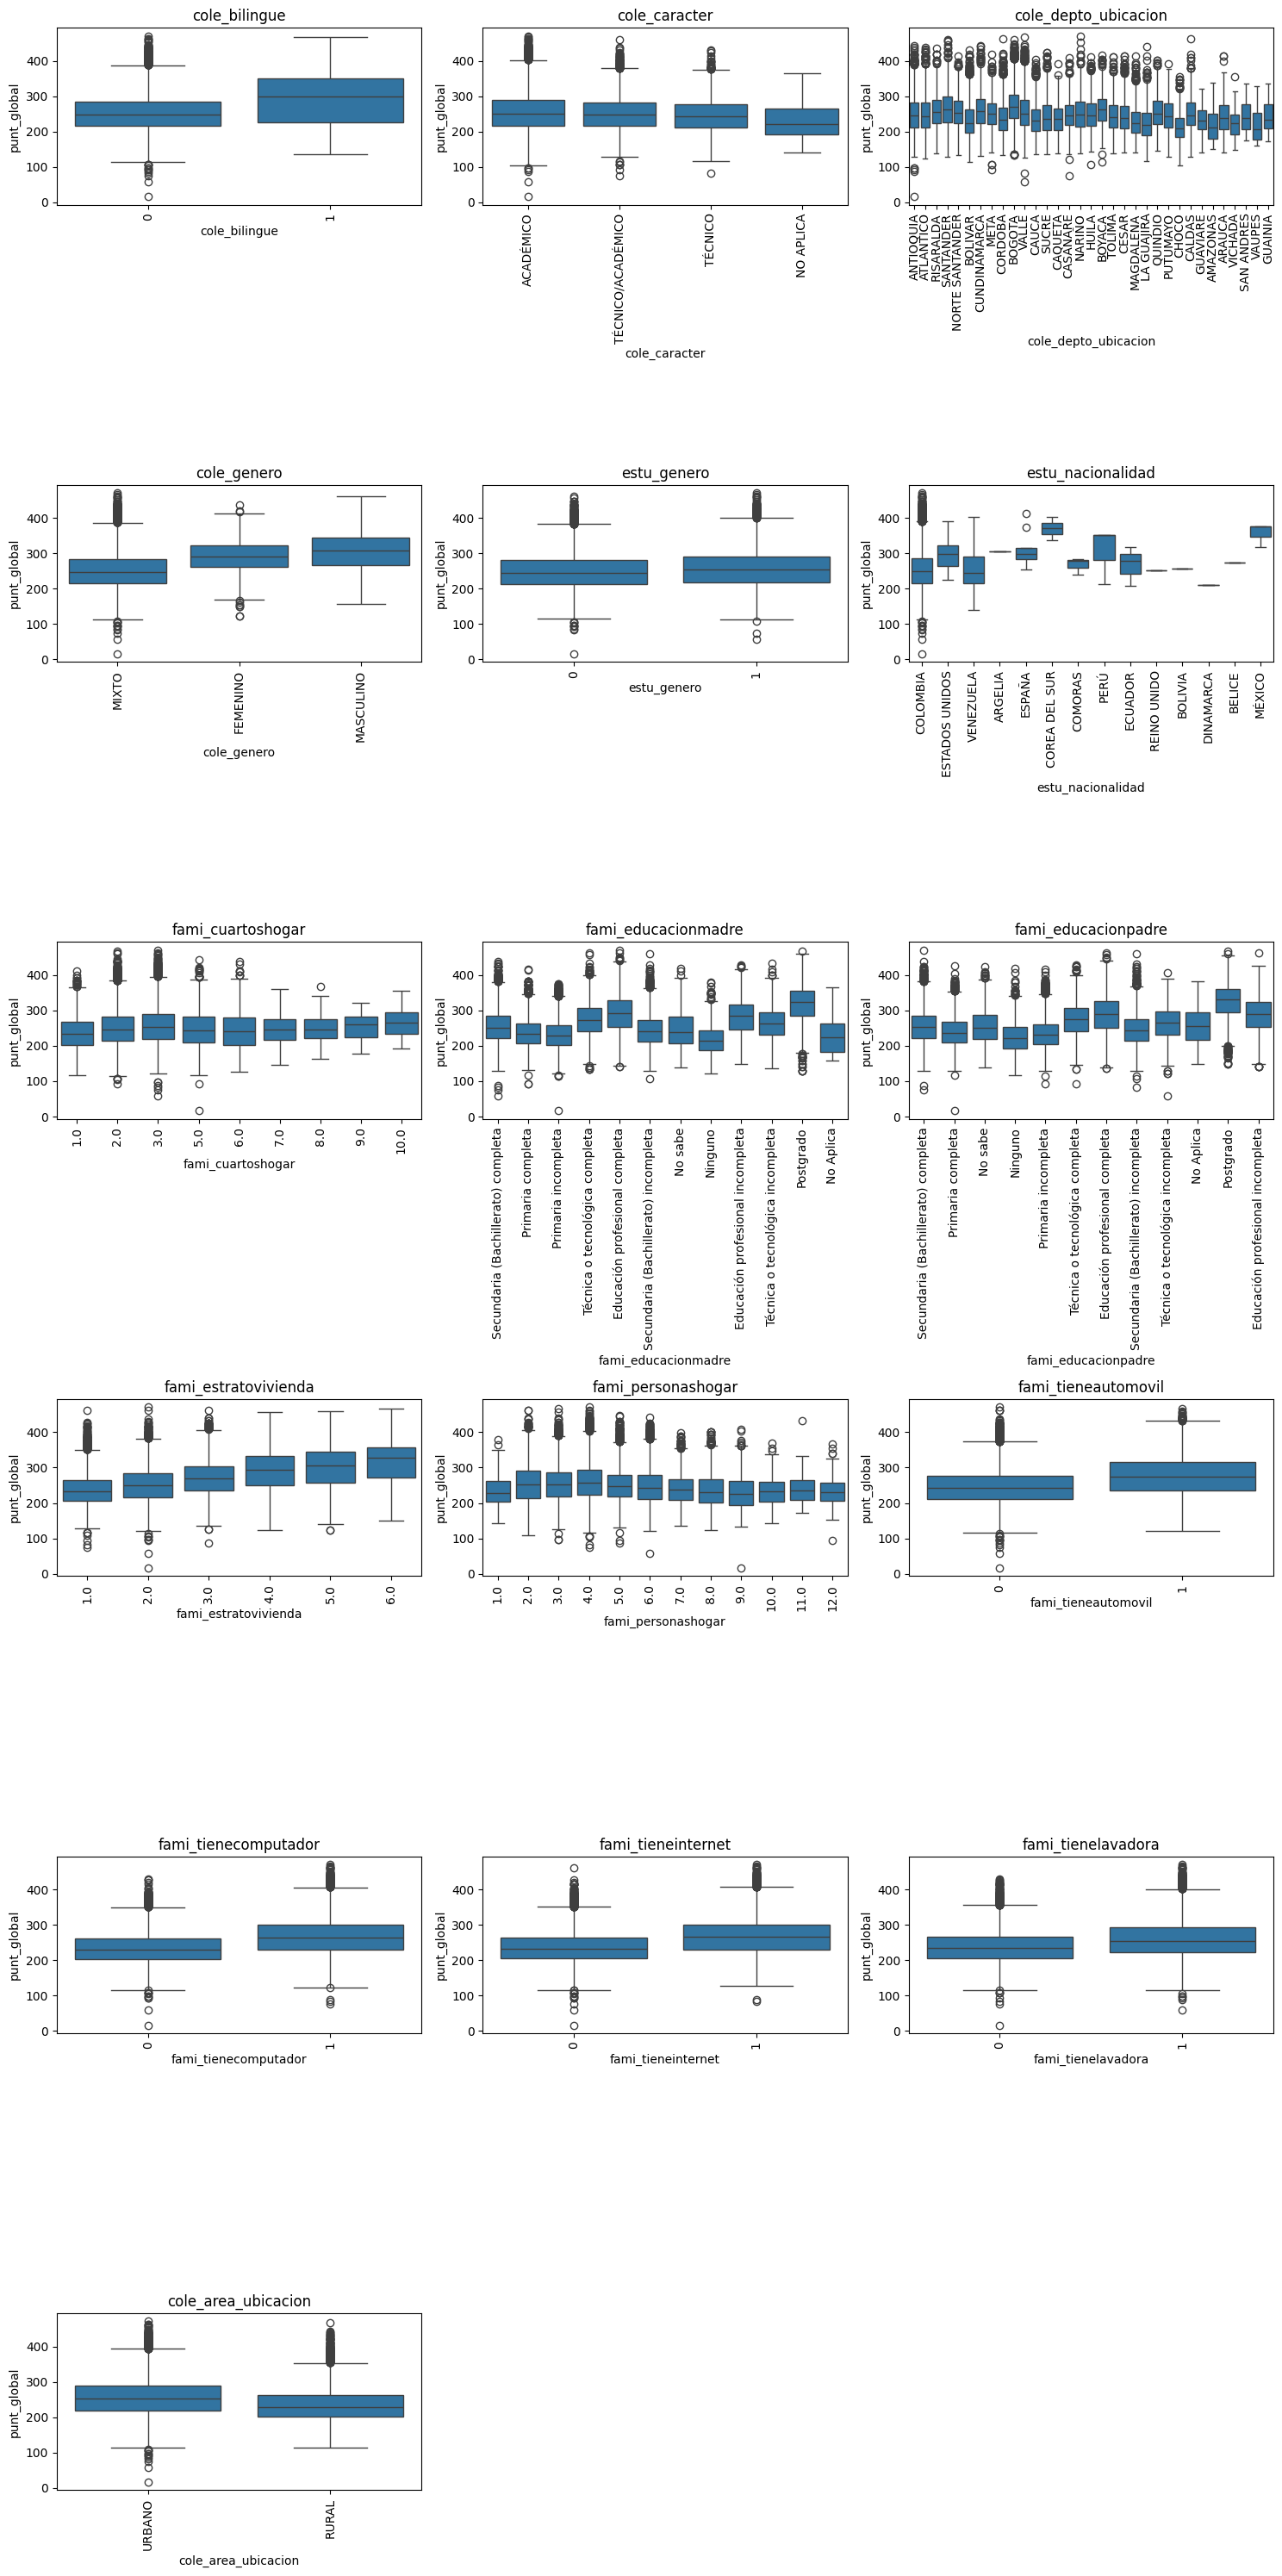

In [ ]:

# Configurar número de filas y columnas para subplots
n_cols = 3
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))  # Ajusta el tamaño del gráfico

# Aplana el array de ejes para iterar fácilmente
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
  # Crear boxplot para cada variable categórica
  sns.boxplot(data=df_estudios, x=var, y='punt_global', ax=axes[i])

  # Título y ajustes del eje X
  axes[i].set_title(var)
  axes[i].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje X para evitar solapamiento

# Ocultar los subplots vacíos si no hay suficientes variables para llenar la matriz
for j in range(i + 1, len(axes)):
  axes[j].set_visible(False)

plt.xticks(rotation=90)  # Rotar etiquetas del eje X
plt.tight_layout()  # Ajustar espaciado entre subplots
plt.show()

* Los coleguios bilingues tiendes a tener un puntaje superior
* Los colegios con caracter academico tienden a tener puntaje más alto.
* Los puntajes de los departamentos como Boyaca, Bogota, Santander, Cundinamarca tienen un puntaje en promedio superior a los otros departamentos.
* Hay una correlación entre el puntaje y la educación de los padres
* Hay una fuerte correlación entre el estrato y el puntaje obtenido
* Los puntajes en zonas urbanas tienden a ser más altos que en las zonas rurales
* Variables como tener internet, computador y automovil muestran una gran relación con el puntaje del estudiante

####Pruebas Chi Cuadrado

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
columnas_categoricas = categorical_vars

def realizar_chi2(df, col1, col2):
  contingency_table = pd.crosstab(df[col1], df[col2])
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  return chi2, p, dof, expected


import numpy as np
from itertools import combinations

# Obtener todas las combinaciones posibles de columnas categóricas
combinaciones = list(combinations(columnas_categoricas, 2))

# Iterar sobre las combinaciones y realizar la prueba de Chi-cuadrado
for col1, col2 in combinaciones:
    chi2, p, dof, expected = realizar_chi2(df_estudios, col1, col2)

    print(f"Prueba Chi-cuadrado entre {col1} y {col2}:")
    print(f"  Estadístico Chi-cuadrado: {chi2:.4f}")
    print(f"  Valor p: {p:.4f}")
    print(f"  Grados de libertad: {dof}")
    print("  Tabla de frecuencias esperadas:")
    print(expected)

    # Interpretar el resultado
    alpha = 0.05  # Nivel de significancia
    if p < alpha:
        print(f"  El valor p ({p:.4f}) es menor que el nivel de significancia ({alpha}).")
        print(f"  Rechazamos la hipótesis nula.  Existe una asociación significativa entre {col1} y {col2}.\n")
    else:
        print(f"  El valor p ({p:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
        print(f"  No rechazamos la hipótesis nula.  No hay evidencia de una asociación significativa entre {col1} y {col2}.\n")

Prueba Chi-cuadrado entre cole_bilingue y cole_caracter:
  Estadístico Chi-cuadrado: 170.3396
  Valor p: 0.0000
  Grados de libertad: 3
  Tabla de frecuencias esperadas:
[[4.66117724e+04 5.47692497e+02 9.02024023e+03 2.74552949e+04]
 [8.77227593e+02 1.03075027e+01 1.69759767e+02 5.16705137e+02]]
  El valor p (0.0000) es menor que el nivel de significancia (0.05).
  Rechazamos la hipótesis nula.  Existe una asociación significativa entre cole_bilingue y cole_caracter.

Prueba Chi-cuadrado entre cole_bilingue y cole_depto_ubicacion:
  Estadístico Chi-cuadrado: 1313.3025
  Valor p: 0.0000
  Grados de libertad: 32
  Tabla de frecuencias esperadas:
[[1.28580138e+02 1.10009633e+04 4.44632081e+02 4.63870025e+03
  1.34753948e+04 3.75826984e+03 2.47737610e+03 1.69313541e+03
  6.34066941e+02 8.78467357e+02 2.28794124e+03 1.95716638e+03
  6.67438886e+02 2.93771262e+03 5.53090900e+03 3.72980554e+01
  1.56062916e+02 2.10734013e+03 1.15623972e+03 2.28107054e+03
  1.78932513e+03 2.61969763e+03 2.2172

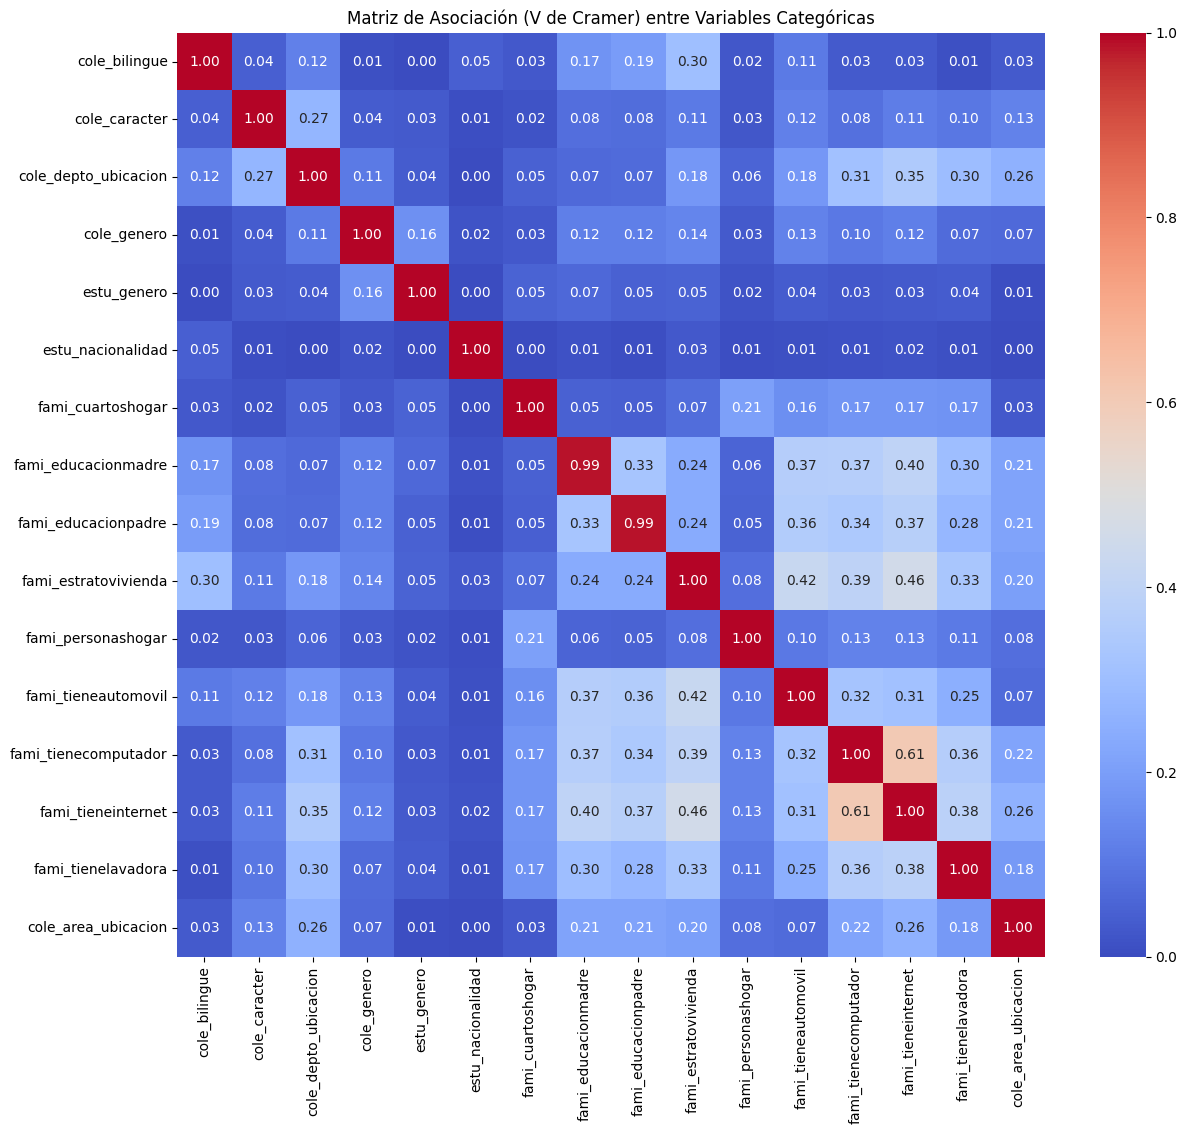

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

def cramers_v(x, y):

  confusion_matrix = pd.crosstab(x, y)
  chi2, _, _, _ = ss.chi2_contingency(confusion_matrix)
  n = len(x)
  phi2 = chi2 / n
  r, k = confusion_matrix.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

def association_matrix(df, categorical_cols):

  n = len(categorical_cols)
  matrix = np.zeros((n, n))
  for i, col1 in enumerate(categorical_cols):
      for j, col2 in enumerate(categorical_cols):
          matrix[i, j] = cramers_v(df[col1], df[col2])
  return pd.DataFrame(matrix, index=categorical_cols, columns=categorical_cols)

# 1. Define tus columnas categóricas

# 2. Calcula la matriz de asociación
association = association_matrix(df_estudios, columnas_categoricas)

# 3. Visualiza la matriz con un mapa de calor
plt.figure(figsize=(14, 12))
sns.heatmap(association, annot=True, cmap="coolwarm", fmt=".2f")  # Ajusta el mapa de color y el formato
plt.title("Matriz de Asociación (V de Cramer) entre Variables Categóricas")
plt.show()

Se hicieron pruebas chi cuadrado y se graficaron en una matriz de krammer para ver la relación entre las variables y que tanto podrian afectar el modelo.

* El estrato tiene una fuerte relación con tener internet, automovil y computador.

* La educación del padre y de la madre estan muy relacionadas casi en sentido 1 a 1

* El departamento de ubicación tiene gran relación con el acceso a internet y otras caracteristicas sociodemograficas.

* El estrato y el caracter bilingue del colegio tiene gran relación.

* Puede existir un problema de multicolinealidad entre las variables y tener a hacer overfitting o tener sesgo en los modelos de predicción, por lo que haremos una selección de variables manual teniendo en cuenta unicamente los más significativos teoricamente y otro usando un modelo de selección de variables wrapping y se validaran en el modelo.

# Fase 3: abordar relación variables-desempeño a través de un modelo

En esta fase propondrás, implementarás y reportarás el desempeño de uno o más modelos (al menos uno predictivo) que busquen explicar las relaciones entre factores sociodemográficos y el desempeño en la prueba. Además, concluirás con respecto a la validez de al menos un modelo y los posibles hallazgos que se podrían reportar para el *stakeholder*.

Pautas generales:

* Seleccionar variables y proponer modelos acordes a estas y al contexto del problema.
* Utilizar librerías especializadas (ej., `statsmodels`, `sklearn`, etc.) para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Los módulos correspondientes a regresión lineal y regresión logística pueden ser útiles.
* Asegurar el cumplimiento de los supuestos y buenas prácticas de cada modelo.
* Utilizar las métricas de evaluación de desempeño (disponibles en las librerías especilizadas), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:

* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?

In [ ]:
df_estudios

periodo  cole_bilingue      cole_caracter cole_depto_ubicacion  \
0         20172              0          ACADÉMICO            ANTIOQUIA   
1         20142              0  TÉCNICO/ACADÉMICO            ATLANTICO   
15        20172              0          ACADÉMICO            ANTIOQUIA   
17        20152              0          ACADÉMICO            RISARALDA   
18        20152              0  TÉCNICO/ACADÉMICO            SANTANDER   
...         ...            ...                ...                  ...   
149991    20194              0          ACADÉMICO                VALLE   
149993    20172              0  TÉCNICO/ACADÉMICO                HUILA   
149994    20142              0          ACADÉMICO                CAUCA   
149996    20152              0            TÉCNICO                VALLE   
149998    20152              0          ACADÉMICO         CUNDINAMARCA   

       cole_genero cole_mcpio_ubicacion  estu_fechanacimiento  estu_genero  \
0            MIXTO              SEGOVIA                  2001            0   
1            MIXTO          SABANALARGA                  1998            1   
15           MIXTO              COCORNA                  2000            0   
17           MIXTO        DOS QUEBRADAS                  1997            0   
18           MIXTO          BUCARAMANGA                  1998            0   
...            ...                  ...                   ...          ...   
149991       MIXTO         BUENAVENTURA                  1990            1   
149993       MIXTO                 HOBO                  1997            1   
149994       MIXTO              POPAYAN                  1998            1   
149996       MIXTO                YUMBO                  1998            1   
149998       MIXTO            CAPARRAPI                  1998            0   

       estu_nacionalidad  fami_cuartoshogar  ... Cgenero_FEMENINO  \
0               COLOMBIA                2.0  ...              0.0   
1               COLOMBIA                2.0  ...              0.0   
15              COLOMBIA                3.0  ...              0.0   
17              COLOMBIA                3.0  ...              0.0   
18              COLOMBIA                3.0  ...              0.0   
...                  ...                ...  ...              ...   
149991          COLOMBIA                2.0  ...              0.0   
149993          COLOMBIA                2.0  ...              0.0   
149994          COLOMBIA                5.0  ...              0.0   
149996          COLOMBIA                2.0  ...              0.0   
149998          COLOMBIA                3.0  ...              0.0   

       Cgenero_MASCULINO  Cgenero_MIXTO  Ccaracter_ACADÉMICO  \
0                    0.0            1.0                  1.0   
1                    0.0            1.0                  0.0   
15                   0.0            1.0                  1.0   
17                   0.0            1.0                  1.0   
18                   0.0            1.0                  0.0   
...                  ...            ...                  ...   
149991               0.0            1.0                  1.0   
149993               0.0            1.0                  0.0   
149994               0.0            1.0                  1.0   
149996               0.0            1.0                  0.0   
149998               0.0            1.0                  1.0   

        Ccaracter_NO APLICA  Ccaracter_TÉCNICO  Ccaracter_TÉCNICO/ACADÉMICO  \
0                       0.0                0.0                          0.0   
1                       0.0                0.0                          1.0   
15                      0.0                0.0                          0.0   
17                      0.0                0.0                          0.0   
18                      0.0                0.0                          1.0   
...                     ...                ...                          ...   
149991                  0.0    

In [ ]:
#Eliminamos las observaciones con NA en puntaje global
df_estudios['punt_global'].dropna(inplace=True)

In [ ]:
df_estudios= df_estudios[df_estudios['punt_global']>0 ]

In [ ]:
df_estudios['punt_global'].isna().sum()

0

#### Se clasificaran los estudiantes en 4 categorias:

Para El puntaje Global:

* Insuficiente: 0-125
* Minimo: 125-250
* Satisfactorio: 250-375
* Avanzado: 375-500

Para El puntaje por área:

* Insuficiente: 0-25
* Minimo: 25-50
* Satisfactorio: 51-75
* Avanzado: 76-100

Para El puntaje por inglés:

* A-: 0-20
* A1: 21-40
* A2: 41-60
* B1: 61-80
* B2: 81-100

In [ ]:
var_numericas

['punt_ingles',
 'punt_matematicas',
 'punt_sociales_ciudadanas',
 'punt_c_naturales',
 'punt_lectura_critica',
 'punt_global']

In [ ]:
df_estudios['PuntajeGlobalCat'] = pd.cut(df_estudios['punt_global'], bins=[0, 125, 250, 375, 500], labels=['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'])
df_estudios['PuntajeInglesCat'] = pd.cut(df_estudios['punt_ingles'], bins=[0, 20, 40, 60, 80, 100], labels=['A-', 'A1', 'A2', 'B1', 'B2'])
df_estudios['punt_matematicasCat'] = pd.cut(df_estudios['punt_matematicas'], bins=[0, 25, 50, 75, 100], labels=['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'])
df_estudios['punt_sociales_ciudadanasCat'] = pd.cut(df_estudios['punt_sociales_ciudadanas'], bins=[0, 25, 50, 75, 100], labels=['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'])
df_estudios['punt_c_naturalessCat'] = pd.cut(df_estudios['punt_c_naturales'], bins=[0, 25, 50, 75, 100], labels=['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'])
df_estudios['punt_lectura_criticaCat'] = pd.cut(df_estudios['punt_lectura_critica'], bins=[0, 25, 50, 75, 100], labels=['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'])


###Regresión Logistica

In [ ]:
### Regresión Logistica
#Importamos las librerias
from sklearn.model_selection import train_test_split

# Definimos nuestros X y Y como variables objetivo

var_x = ['cole_bilingue','estu_genero','fami_cuartoshogar','fami_estratovivienda','fami_personashogar',
                 'fami_tieneautomovil','fami_tienecomputador','fami_tieneinternet',
                 'fami_tienelavadora','depto_AMAZONAS','depto_ANTIOQUIA','depto_ARAUCA',
                 'depto_ATLANTICO','depto_BOGOTA','depto_BOLIVAR','depto_BOYACA','depto_CALDAS','depto_CAQUETA',
                 'depto_CASANARE','depto_CAUCA','depto_CESAR','depto_CHOCO','depto_CORDOBA','depto_CUNDINAMARCA',
                 'depto_GUAINIA','depto_GUAVIARE','depto_HUILA','depto_LA GUAJIRA','depto_MAGDALENA','depto_META',
                 'depto_NARIÑO','depto_NORTE SANTANDER','depto_PUTUMAYO','depto_QUINDIO','depto_RISARALDA','depto_SAN ANDRES',
                 'depto_SANTANDER','depto_SUCRE','depto_TOLIMA','depto_VALLE','depto_VAUPES','depto_VICHADA',
                 'EduPadre_Educación profesional completa','EduPadre_Educación profesional incompleta','EduPadre_Ninguno',
                 'EduPadre_No Aplica','EduPadre_No sabe','EduPadre_Postgrado','EduPadre_Primaria completa','EduPadre_Primaria incompleta',
                 'EduPadre_Secundaria (Bachillerato) completa','EduPadre_Secundaria (Bachillerato) incompleta',
                 'EduPadre_Técnica o tecnológica completa','EduPadre_Técnica o tecnológica incompleta',
                 'EduMadre_Educación profesional completa','EduMadre_Educación profesional incompleta','EduMadre_Ninguno',
                 'EduMadre_No Aplica','EduMadre_No sabe','EduMadre_Postgrado','EduMadre_Primaria completa','EduMadre_Primaria incompleta',
                 'EduMadre_Secundaria (Bachillerato) completa','EduMadre_Secundaria (Bachillerato) incompleta','EduMadre_Técnica o tecnológica completa',
                 'EduMadre_Técnica o tecnológica incompleta','Cgenero_FEMENINO','Cgenero_MASCULINO','Cgenero_MIXTO','Ccaracter_ACADÉMICO','Ccaracter_NO APLICA',
                 'Ccaracter_TÉCNICO','Ccaracter_TÉCNICO/ACADÉMICO','carea_RURAL','carea_URBANO','edad']

x = df_estudios[var_x]

y = df_estudios['PuntajeGlobalCat']


In [ ]:
for i in var_x:
  print(f'para {i} tenemos {df_estudios[i].unique()}')

para cole_bilingue tenemos [0 1]
para estu_genero tenemos [0 1]
para fami_cuartoshogar tenemos [ 2.  3.  1. 10.  8.  5.  6.  7.  9.]
para fami_estratovivienda tenemos [1. 2. 3. 4. 5. 6.]
para fami_personashogar tenemos [ 4.  3.  6.  7.  5.  8.  2. 12. 11.  9. 10.  1.]
para fami_tieneautomovil tenemos [0 1]
para fami_tienecomputador tenemos [1 0]
para fami_tieneinternet tenemos [1 0]
para fami_tienelavadora tenemos [1 0]
para depto_AMAZONAS tenemos [0. 1.]
para depto_ANTIOQUIA tenemos [1. 0.]
para depto_ARAUCA tenemos [0. 1.]
para depto_ATLANTICO tenemos [0. 1.]
para depto_BOGOTA tenemos [0. 1.]
para depto_BOLIVAR tenemos [0. 1.]
para depto_BOYACA tenemos [0. 1.]
para depto_CALDAS tenemos [0. 1.]
para depto_CAQUETA tenemos [0. 1.]
para depto_CASANARE tenemos [0. 1.]
para depto_CAUCA tenemos [0. 1.]
para depto_CESAR tenemos [0. 1.]
para depto_CHOCO tenemos [0. 1.]
para depto_CORDOBA tenemos [0. 1.]
para depto_CUNDINAMARCA tenemos [0. 1.]
para depto_GUAINIA tenemos [0. 1.]
para depto_GUAV

In [ ]:
#Creamos los conjunto de prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=42) # Dejamos un conjunto delo más grande posible para

print(f'tenemos un conjunto de entrenamiento de tamño {y_train.size}' )
print(f'tenemos un conjunto de prueba  de tamño {y_test.size}' )

tenemos un conjunto de entrenamiento de tamño 76688
tenemos un conjunto de prueba  de tamño 8521


In [ ]:
y_train.unique()

['Satisfactorio', 'Minimo', 'Avanzado', 'Insuficiente']
Categories (4, object): ['Insuficiente' < 'Minimo' < 'Satisfactorio' < 'Avanzado']

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=150000)

# Declaramos una instancia del modelo
lr = LogisticRegression(max_iter=100000)

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

probabilities = lr.predict_proba(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva


In [ ]:
y_pred

array(['Satisfactorio', 'Satisfactorio', 'Minimo', ..., 'Minimo',
       'Satisfactorio', 'Satisfactorio'], dtype=object)

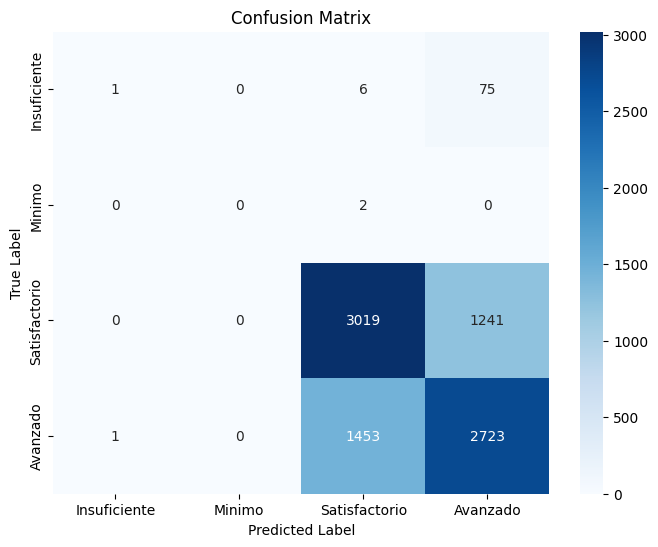

Confusion Matrix:
[[   1    0    6   75]
 [   0    0    2    0]
 [   0    0 3019 1241]
 [   1    0 1453 2723]]


In [ ]:
from sklearn.metrics import confusion_matrix
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión (opcional, pero muy útil)
class_names = ['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'] # Asegúrate de que este orden coincida con el orden de tus clases en y_test e y_pred

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión (si no quieres la visualización)
print("Confusion Matrix:")
print(cm)

In [ ]:
# Métricas adicionales (opcional)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

 Insuficiente       0.50      0.01      0.02        82
       Minimo       0.00      0.00      0.00         2
Satisfactorio       0.67      0.71      0.69      4260
     Avanzado       0.67      0.65      0.66      4177

     accuracy                           0.67      8521
    macro avg       0.46      0.34      0.34      8521
 weighted avg       0.67      0.67      0.67      8521



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



* El modelo con Regresión logisica no ha sido el mejor, la precisión para el nivel satisfactorio y avanzado es 0.67, para insuficiente solo 0.5 y minimo 0.

* El modelo no predice bien ha pesar de tener gran cantidad de valores.

* El valor f1 score ha obtenido un valor muy bajo para insuficiente y minimo.

* Se debe considerar el desbalanceo de la muestra y la selección de variables para mejorar el desempeño.

* Se utilizaran 3 modelos Regresión logistica, arbol de desición y random forest para saber cual es el que mejor desempeño presenta si hacer transformaciones y luego se harán las transformaciones y se obtendra el resultado final.

* Se evaluara el modelo teniendo en cuenta la presición, el AUC y el f1 score

###Modelo con arbol de desición

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # Dejamos un conjunto delo más grande posible para

#Arbol de decision
clfTree = DecisionTreeClassifier()
clfTree.fit(X_train, y_train)
#plot_tree(clfTree)
#plt.show()

DecisionTreeClassifier()

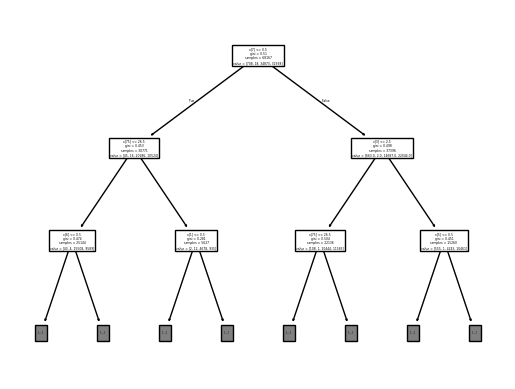

In [ ]:
plot_tree(clfTree,max_depth=2)
plt.show()

In [ ]:
ypred = clfTree.predict(X_test)

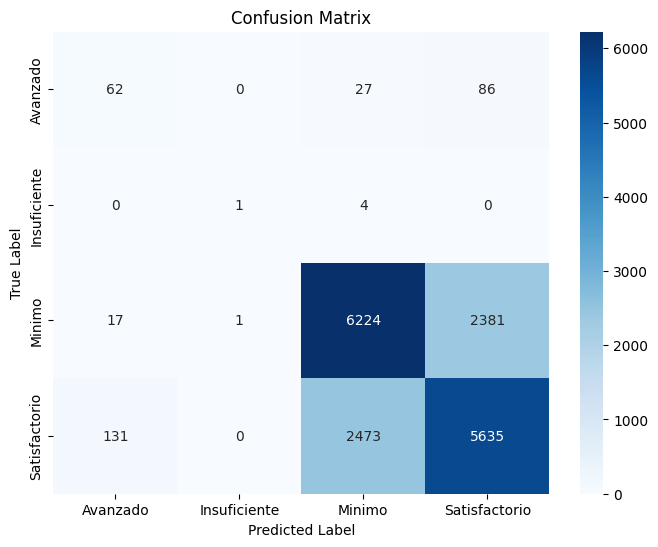

Confusion Matrix:
[[  62    0   27   86]
 [   0    1    4    0]
 [  17    1 6224 2381]
 [ 131    0 2473 5635]]


In [ ]:
# Generar la matriz de confusión
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ypred = clfTree.predict(X_test)
cm = confusion_matrix(y_test, ypred)



# Visualizar la matriz de confusión (opcional, pero muy útil)
#class_names = ['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'] # Asegúrate de que este orden coincida con el orden de tus clases en y_test e y_pred
class_names = ['Avanzado', 'Insuficiente', 'Minimo', 'Satisfactorio']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión (si no quieres la visualización)
print("Confusion Matrix:")
print(cm)

In [ ]:
# Métricas adicionales (opcional)
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred, target_names=class_names))

               precision    recall  f1-score   support

     Avanzado       0.30      0.35      0.32       175
 Insuficiente       0.50      0.20      0.29         5
       Minimo       0.71      0.72      0.72      8623
Satisfactorio       0.70      0.68      0.69      8239

     accuracy                           0.70     17042
    macro avg       0.55      0.49      0.50     17042
 weighted avg       0.70      0.70      0.70     17042



* El modelo con un arbol de desición ha logrado un progreso significativo con respecto a la regresión logistica, con un valor maximo para satesfactorio de (0.71) y minimo de 0,22 para insuficiente. y un promedio de 0,69

* Igualmente el f1 recall ha logrado un promedio ponderado de 0.69

* La matriz de confusión muestra buenas predicciones para nivel satisfactorio y avanzado, sin embargo  para minimo e insuficiente es aun bajo.

* Se tienen muestras desbalanceadas.

In [ ]:
df_estudios['PuntajeGlobalCat'].value_counts()/df_estudios['PuntajeGlobalCat'].size*100


PuntajeGlobalCat
Minimo           51.046251
Satisfactorio    47.890481
Avanzado          1.036276
Insuficiente      0.026992
Name: count, dtype: float64

###El modelo Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

clfRF = RandomForestClassifier(random_state=42,
                        #class_weight='balanced',
                         n_estimators=15,  # Número de árboles
                         max_depth=15,          # Profundidad máxima de los árboles
                         min_samples_split=15,  # Mínimo de muestras para dividir un nodo
                         min_samples_leaf=6,      # Mínimo de muestras en una hoja
                         max_features=0.7)   # Número de características a considerar en cada división

# Entrenar el modelo
clfRF.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = clfRF.predict_proba(X_test)

auc_test = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  #  o 'ovr', según la estrategia deseada

ypred = clfRF.predict(X_test)
print(f"AUC en el conjunto de prueba: {auc_test:.4f}")

AUC en el conjunto de prueba: 0.7970


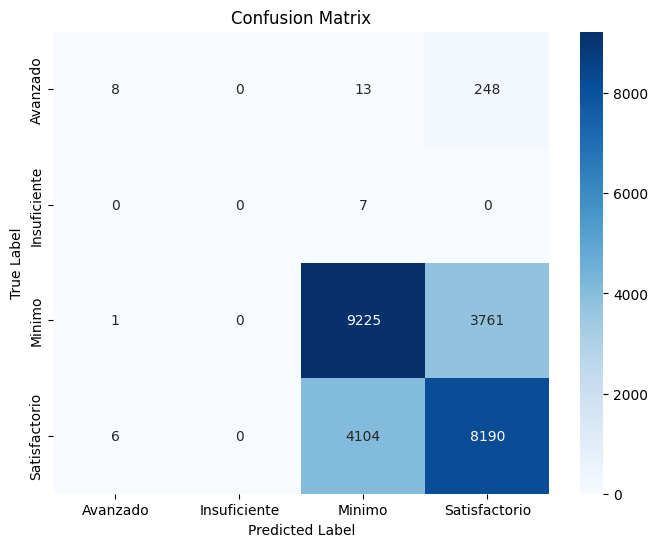

Confusion Matrix:
[[   8    0   13  248]
 [   0    0    7    0]
 [   1    0 9225 3761]
 [   6    0 4104 8190]]


In [ ]:
# Generar la matriz de confusión
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)

ypred = clfRF.predict(X_test)

class_names = ['Avanzado', 'Insuficiente', 'Minimo', 'Satisfactorio']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión (si no quieres la visualización)
print("Confusion Matrix:")
print(cm)

In [ ]:
print(classification_report(y_test, ypred, target_names=class_names))

               precision    recall  f1-score   support

     Avanzado       0.53      0.03      0.06       269
 Insuficiente       0.00      0.00      0.00         7
       Minimo       0.69      0.71      0.70     12987
Satisfactorio       0.67      0.67      0.67     12300

     accuracy                           0.68     25563
    macro avg       0.47      0.35      0.36     25563
 weighted avg       0.68      0.68      0.68     25563



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



* El modelo de random forest no se comporta de la mejor manera no tiene buen pronosticos para las clases desbalanceadas.

* El modelo hace promedios entre los arboles y no esta captando bien las clases insuficiente y avanzados, si se aumentan la cantidad de arboles la eficiencia disminuye.

* El mejor modelo hasta el momento es con un solo arbol.

* El modelo con 15 arboles pronostica bien el 53% de los casos avanzados, 69% de loc casos minimos y 67% de la clase satisfactorio

####Variables seleccionadas teoricamente

In [ ]:
x = df_estudios[['cole_bilingue','estu_genero','fami_estratovivienda','fami_personashogar','carea_URBANO','edad','Ccaracter_ACADÉMICO','depto_BOGOTA','depto_BOYACA','EduMadre_Educación profesional completa','Cgenero_MIXTO']]
y = df_estudios['PuntajeGlobalCat']

####Reg Logistica


In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=42) # Dejamos un conjunto delo más grande posible para


# Declaramos una instancia del modelo
lr = LogisticRegression(max_iter=100000)

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

probabilities = lr.predict_proba(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

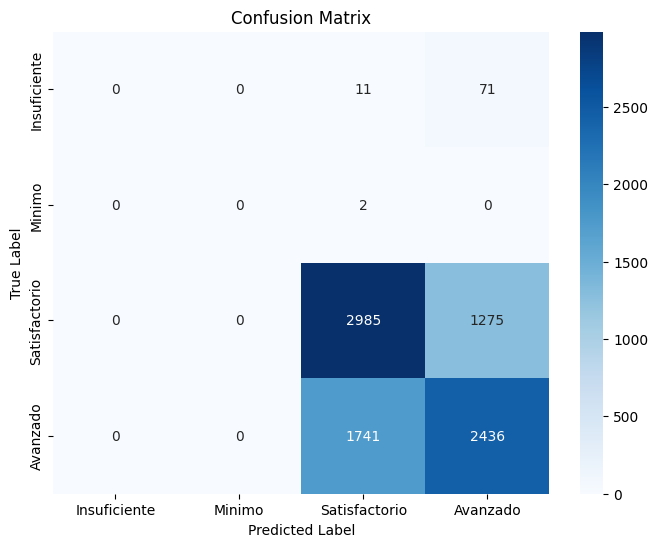

Confusion Matrix:
[[   0    0   11   71]
 [   0    0    2    0]
 [   0    0 2985 1275]
 [   0    0 1741 2436]]
               precision    recall  f1-score   support

 Insuficiente       0.00      0.00      0.00        82
       Minimo       0.00      0.00      0.00         2
Satisfactorio       0.63      0.70      0.66      4260
     Avanzado       0.64      0.58      0.61      4177

     accuracy                           0.64      8521
    macro avg       0.32      0.32      0.32      8521
 weighted avg       0.63      0.64      0.63      8521



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión (opcional, pero muy útil)
class_names = ['Insuficiente', 'Minimo', 'Satisfactorio', 'Avanzado'] # Asegúrate de que este orden coincida con el orden de tus clases en y_test e y_pred

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión (si no quieres la visualización)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, y_pred, target_names=class_names))

* El modelo ha tomado en cuenta unicamente variables teoricas explican en gran medida los datos, como son el estrato, si es urbano o rual, genero, caracter academico del colegio y educación de la madre y si esta afuera o dentro de bogotá,  sin embargo no predice bien el modelo bajando la presición ponderada al 63%.

* El modelo no tiene en cuenta el desbalance de las clases, no captura datos.

#### Modelo Arbol de desicón

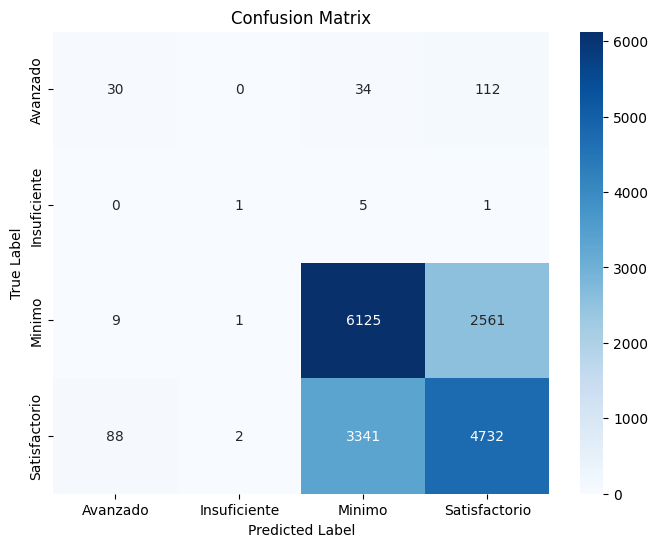

Confusion Matrix:
[[  30    0   34  112]
 [   0    1    5    1]
 [   9    1 6125 2561]
 [  88    2 3341 4732]]
               precision    recall  f1-score   support

     Avanzado       0.24      0.17      0.20       176
 Insuficiente       0.25      0.14      0.18         7
       Minimo       0.64      0.70      0.67      8696
Satisfactorio       0.64      0.58      0.61      8163

     accuracy                           0.64     17042
    macro avg       0.44      0.40      0.42     17042
 weighted avg       0.64      0.64      0.64     17042



In [ ]:
# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # Dejamos un conjunto delo más grande posible para

#Arbol de decision
clfTree = DecisionTreeClassifier()
clfTree.fit(X_train, y_train)

ypred = clfTree.predict(X_test)
cm = confusion_matrix(y_test, ypred)


class_names = ['Avanzado', 'Insuficiente', 'Minimo', 'Satisfactorio']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión (si no quieres la visualización)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, ypred, target_names=class_names))

#### Modelo Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

clfRF = RandomForestClassifier(random_state=42,
                        #class_weight='balanced',
                         n_estimators=15,  # Número de árboles
                         max_depth=35,          # Profundidad máxima de los árboles
                         min_samples_split=15,  # Mínimo de muestras para dividir un nodo
                         min_samples_leaf=6,      # Mínimo de muestras en una hoja
                         max_features=0.7)   # Número de características a considerar en cada división

# Entrenar el modelo
clfRF.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = clfRF.predict_proba(X_test)

auc_test = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  #  o 'ovr', según la estrategia deseada

ypred = clfRF.predict(X_test)
print(f"AUC en el conjunto de prueba: {auc_test:.4f}")

AUC en el conjunto de prueba: 0.7119


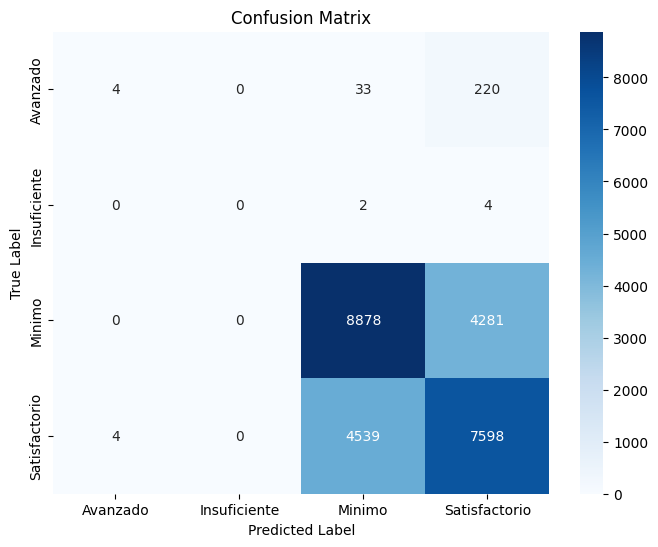

Confusion Matrix:
[[   4    0   33  220]
 [   0    0    2    4]
 [   0    0 8878 4281]
 [   4    0 4539 7598]]
               precision    recall  f1-score   support

     Avanzado       0.50      0.02      0.03       257
 Insuficiente       0.00      0.00      0.00         6
       Minimo       0.66      0.67      0.67     13159
Satisfactorio       0.63      0.63      0.63     12141

     accuracy                           0.64     25563
    macro avg       0.45      0.33      0.33     25563
 weighted avg       0.64      0.64      0.64     25563



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)

ypred = clfRF.predict(X_test)

class_names = ['Avanzado', 'Insuficiente', 'Minimo', 'Satisfactorio']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión (si no quieres la visualización)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, ypred, target_names=class_names))

* El modelo tiene una presición ponderada del 65% lo que no es mejor que el modelo de un solo arbol con todas las variables del 0.69.
* Las categorias insuficiente y avanzado no son capturados con confianza aun con este modelo.

### Selección de variables


In [ ]:
len(var_x)

76

<Figure size 1000x600 with 0 Axes>

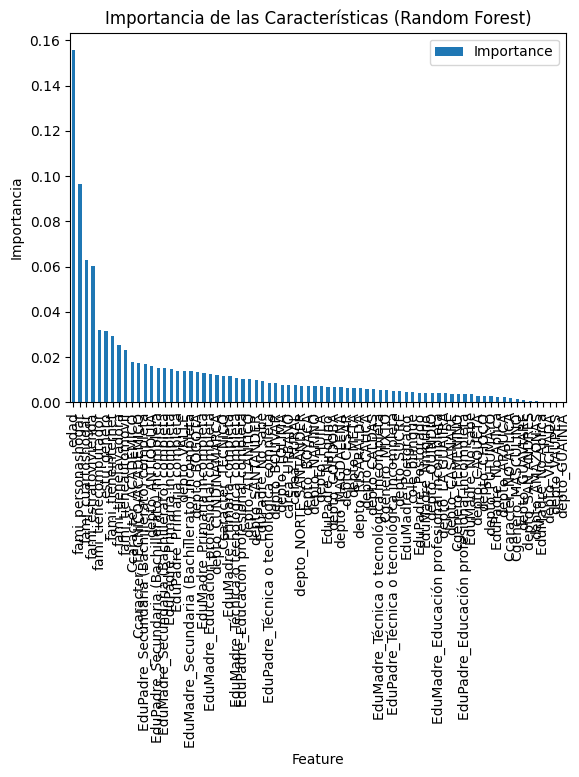

Características seleccionadas: ['edad', 'fami_personashogar', 'fami_cuartoshogar', 'fami_estratovivienda', 'fami_tienecomputador', 'estu_genero', 'fami_tieneinternet', 'fami_tienelavadora', 'fami_tieneautomovil', 'Ccaracter_ACADÉMICO', 'Ccaracter_TÉCNICO/ACADÉMICO', 'EduPadre_Secundaria (Bachillerato) completa', 'depto_ANTIOQUIA', 'EduPadre_Secundaria (Bachillerato) incompleta', 'EduMadre_Secundaria (Bachillerato) completa', 'EduPadre_Primaria incompleta', 'EduPadre_Primaria completa', 'depto_VALLE', 'EduMadre_Secundaria (Bachillerato) incompleta', 'depto_BOGOTA', 'EduMadre_Primaria incompleta', 'EduMadre_Educación profesional completa', 'depto_CUNDINAMARCA', 'Ccaracter_TÉCNICO', 'EduMadre_Primaria completa', 'EduMadre_Técnica o tecnológica completa', 'EduPadre_Educación profesional completa', 'depto_ATLANTICO', 'depto_SANTANDER', 'EduPadre_No sabe', 'EduPadre_Técnica o tecnológica completa', 'depto_BOLIVAR', 'depto_TOLIMA', 'carea_URBANO', 'carea_RURAL', 'depto_NORTE SANTANDER', 'dept

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


var_x = ['cole_bilingue','estu_genero','fami_cuartoshogar','fami_estratovivienda','fami_personashogar',
                 'fami_tieneautomovil','fami_tienecomputador','fami_tieneinternet',
                 'fami_tienelavadora','depto_AMAZONAS','depto_ANTIOQUIA','depto_ARAUCA',
                 'depto_ATLANTICO','depto_BOGOTA','depto_BOLIVAR','depto_BOYACA','depto_CALDAS','depto_CAQUETA',
                 'depto_CASANARE','depto_CAUCA','depto_CESAR','depto_CHOCO','depto_CORDOBA','depto_CUNDINAMARCA',
                 'depto_GUAINIA','depto_GUAVIARE','depto_HUILA','depto_LA GUAJIRA','depto_MAGDALENA','depto_META',
                 'depto_NARIÑO','depto_NORTE SANTANDER','depto_PUTUMAYO','depto_QUINDIO','depto_RISARALDA','depto_SAN ANDRES',
                 'depto_SANTANDER','depto_SUCRE','depto_TOLIMA','depto_VALLE','depto_VAUPES','depto_VICHADA',
                 'EduPadre_Educación profesional completa','EduPadre_Educación profesional incompleta','EduPadre_Ninguno',
                 'EduPadre_No Aplica','EduPadre_No sabe','EduPadre_Postgrado','EduPadre_Primaria completa','EduPadre_Primaria incompleta',
                 'EduPadre_Secundaria (Bachillerato) completa','EduPadre_Secundaria (Bachillerato) incompleta',
                 'EduPadre_Técnica o tecnológica completa','EduPadre_Técnica o tecnológica incompleta',
                 'EduMadre_Educación profesional completa','EduMadre_Educación profesional incompleta','EduMadre_Ninguno',
                 'EduMadre_No Aplica','EduMadre_No sabe','EduMadre_Postgrado','EduMadre_Primaria completa','EduMadre_Primaria incompleta',
                 'EduMadre_Secundaria (Bachillerato) completa','EduMadre_Secundaria (Bachillerato) incompleta','EduMadre_Técnica o tecnológica completa',
                 'EduMadre_Técnica o tecnológica incompleta','Cgenero_FEMENINO','Cgenero_MASCULINO','Cgenero_MIXTO','Ccaracter_ACADÉMICO','Ccaracter_NO APLICA',
                 'Ccaracter_TÉCNICO','Ccaracter_TÉCNICO/ACADÉMICO','carea_RURAL','carea_URBANO','edad']

x = df_estudios[var_x]

y = df_estudios['PuntajeGlobalCat']

# Divide los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Entrena un Random Forest (si aún no lo tienes)
rf = RandomForestClassifier(random_state=42)  # Usa los mismos parámetros que tu mejor modelo
rf.fit(x, y)

# Obtiene la importancia de las características
importances = rf.feature_importances_

# Crea un DataFrame para visualizar la importancia
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False).set_index('Feature')

# Grafica la importancia de las características
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Importancia de las Características (Random Forest)')
plt.ylabel('Importancia')
plt.show()

# Selecciona las características más importantes (por ejemplo, las 20 primeras)
num_top_features = 76 # Ajusta este valor según la gráfica
top_features = feature_importances.head(num_top_features).index.tolist()

# Crea un nuevo conjunto de datos con solo las características seleccionadas
x_selected = x[top_features]

print("Características seleccionadas:", top_features)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve


variables_opt = []
auc = 0
auc_ant = 0

for ind, i in enumerate(top_features):
  feat = top_features[0:ind + 1]
  x = df_estudios[feat]
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

  clfRF = RandomForestClassifier(random_state=42,
                        class_weight='balanced',
                         n_estimators=150,  # Número de árboles
                         max_depth = None,          # Profundidad máxima de los árboles
                         min_samples_split=50,  # Mínimo de muestras para dividir un nodo
                         min_samples_leaf=10,      # Mínimo de muestras en una hoja
                         max_features=0.7)   # Número de características a considerar en cada división

# Entrenar el modelo
  clfRF.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
  y_pred_proba = clfRF.predict_proba(X_test)

  auc_test = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  #  o 'ovr', según la estrategia deseada

  if auc_test > auc_ant:
    variables_opt.append(i)

  auc_ant = auc_test


  ypred = clfRF.predict(X_test)
  print(f"AUC en el conjunto de prueba: para {ind+1} y {i}  es {auc_test:.4f}")

AUC en el conjunto de prueba: para 1 y edad  es 0.6803
AUC en el conjunto de prueba: para 2 y fami_personashogar  es 0.6291
AUC en el conjunto de prueba: para 3 y fami_cuartoshogar  es 0.6740
AUC en el conjunto de prueba: para 4 y fami_estratovivienda  es 0.7475
AUC en el conjunto de prueba: para 5 y fami_tienecomputador  es 0.7324
AUC en el conjunto de prueba: para 6 y estu_genero  es 0.7490
AUC en el conjunto de prueba: para 7 y fami_tieneinternet  es 0.7869
AUC en el conjunto de prueba: para 8 y fami_tienelavadora  es 0.7879
AUC en el conjunto de prueba: para 9 y fami_tieneautomovil  es 0.7742
AUC en el conjunto de prueba: para 10 y Ccaracter_ACADÉMICO  es 0.7343
AUC en el conjunto de prueba: para 11 y Ccaracter_TÉCNICO/ACADÉMICO  es 0.7972
AUC en el conjunto de prueba: para 12 y EduPadre_Secundaria (Bachillerato) completa  es 0.7596
AUC en el conjunto de prueba: para 13 y depto_ANTIOQUIA  es 0.7633
AUC en el conjunto de prueba: para 14 y EduPadre_Secundaria (Bachillerato) incomplet

In [ ]:
variables_opt

['edad',
 'fami_cuartoshogar',
 'fami_estratovivienda',
 'estu_genero',
 'fami_tieneinternet',
 'fami_tienelavadora',
 'Ccaracter_TÉCNICO/ACADÉMICO',
 'depto_ANTIOQUIA',
 'EduPadre_Secundaria (Bachillerato) incompleta',
 'EduMadre_Secundaria (Bachillerato) completa',
 'EduPadre_Primaria completa',
 'depto_BOGOTA',
 'EduMadre_Primaria incompleta',
 'EduMadre_Educación profesional completa',
 'depto_CUNDINAMARCA',
 'EduPadre_Educación profesional completa',
 'depto_SANTANDER',
 'EduPadre_Técnica o tecnológica completa',
 'depto_TOLIMA',
 'carea_RURAL',
 'depto_NARIÑO',
 'EduPadre_Ninguno',
 'depto_CESAR',
 'depto_META',
 'depto_CALDAS',
 'Cgenero_MIXTO',
 'EduPadre_Técnica o tecnológica incompleta',
 'cole_bilingue',
 'EduPadre_Postgrado',
 'EduMadre_Ninguno',
 'EduMadre_Educación profesional incompleta',
 'depto_CASANARE',
 'Cgenero_FEMENINO',
 'EduPadre_Educación profesional incompleta',
 'depto_CHOCO',
 'EduPadre_No Aplica',
 'depto_ARAUCA',
 'Ccaracter_NO APLICA',
 'depto_SAN ANDRES'

In [ ]:
variables_opt

x = df_estudios[variables_opt]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

clfRF = RandomForestClassifier(random_state=42,
                        class_weight='balanced',
                         n_estimators=150,  # Número de árboles
                         max_depth = None,          # Profundidad máxima de los árboles
                         min_samples_split=50,  # Mínimo de muestras para dividir un nodo
                         min_samples_leaf=10,      # Mínimo de muestras en una hoja
                         max_features=0.7)   # Número de características a considerar en cada división

# Entrenar el modelo
clfRF.fit(X_train, y_train)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = clfRF.predict_proba(X_test)

auc_test = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')  #  o 'ovr', según la estrategia deseada
ypred = clfRF.predict(X_test)
print(f"AUC en el conjunto de prueba: para  es {auc_test:.4f}")

AUC en el conjunto de prueba: para  es 0.8300


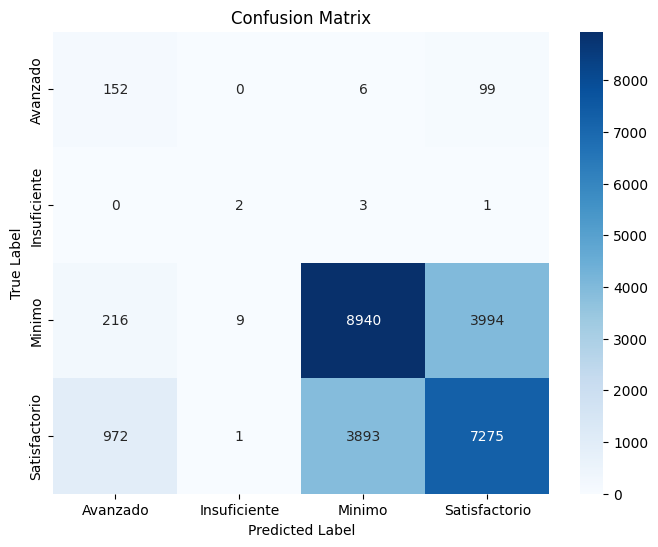

Confusion Matrix:
[[ 152    0    6   99]
 [   0    2    3    1]
 [ 216    9 8940 3994]
 [ 972    1 3893 7275]]
               precision    recall  f1-score   support

     Avanzado       0.11      0.59      0.19       257
 Insuficiente       0.17      0.33      0.22         6
       Minimo       0.70      0.68      0.69     13159
Satisfactorio       0.64      0.60      0.62     12141

     accuracy                           0.64     25563
    macro avg       0.40      0.55      0.43     25563
 weighted avg       0.66      0.64      0.65     25563



In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)

ypred = clfRF.predict(X_test)

class_names = ['Avanzado', 'Insuficiente', 'Minimo', 'Satisfactorio']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Imprimir la matriz de confusión (si no quieres la visualización)
print("Confusion Matrix:")
print(cm)
print(classification_report(y_test, ypred, target_names=class_names))

In [ ]:
  pd.DataFrame(y_test.tolist()).value_counts()

0            
Minimo           13159
Satisfactorio    12141
Avanzado           257
Insuficiente         6
Name: count, dtype: int64

In [ ]:
df_estudios.columns

Index(['periodo', 'cole_bilingue', 'cole_caracter', 'cole_depto_ubicacion',
       'cole_genero', 'cole_mcpio_ubicacion', 'estu_fechanacimiento',
       'estu_genero', 'estu_nacionalidad', 'fami_cuartoshogar',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
       'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneinternet', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global', 'cole_area_ubicacion', 'cole_jornada',
       'fami_tienelavadora', 'depto_AMAZONAS', 'depto_ANTIOQUIA',
       'depto_ARAUCA', 'depto_ATLANTICO', 'depto_BOGOTA', 'depto_BOLIVAR',
       'depto_BOYACA', 'depto_CALDAS', 'depto_CAQUETA', 'depto_CASANARE',
       'depto_CAUCA', 'depto_CESAR', 'depto_CHOCO', 'depto_CORDOBA',
       'depto_CUNDINAMARCA', 'depto_GUAINIA', 'depto_GUAVIARE', 'depto_HUILA',
       'depto_LA GUAJIRA', 'depto_MAGDALENA', 'depto_META', 'depto_NAR

* El mejor modelo que se tomará en cuenta es Random forest tomando en cuenta desbalance de clases y selección de variables más importantes que aumentan el AUC.

* El valor que maximiza el AUC (0.83) son 41 variables, 'edad',
 'fami_cuartoshogar',
 'fami_estratovivienda',
 'estu_genero',
 'fami_tieneinternet',
 'fami_tienelavadora',
 'Ccaracter_TÉCNICO/ACADÉMICO',
 'depto_ANTIOQUIA',

* La presición del modelo para avanzado es 0.56, insuficiente 0.28, Minimo, 0.70 y satisfactorio 0,64

* Las vairables demograficas que mejor predicen el modelo son variables demograficas y del estrato, si es rural o no y también las principales ubicaciones con mejor y peores calificaciones.

#Fase 4 Alternativa 1: desarrollar una herramienta interactiva de análisis

En esta fase desarrollarás, a partir de alguno de los análisis realizados, una herramienta interactiva que sea relevante en el contexto del problema, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

Pautas generales:

* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar el/los parámetro(s) que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar una librería especializada (ej., `ipywidgets`, `panel`, etc.) para implementar la herramienta.

Preguntas guía:

* ¿Cuál o cuáles preguntas podrá hacerle el usuario a la herramienta y cómo aporta la respuesta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta?

### Guia De Usuario

* Primero dirijase al dashboard en la parte inferior de este archivo (Dashboard de resultados Icfes)

* Encontrara dos cajas de las que podria seleccionar el periodo y el estrato socioeconomico de los estudiantes.

* En el primer Grafico encontrará un grafico de barras con los resultados por Area del colegio, que le indicarán si es urbano o rural.

* Luego encontrará un BoxPlot, con el que puede interactual y mirar para las personas que cuentan (1) o no (0) con internet los cuartiles y promedio de resultados globales.

* La Edad la encontrará en el siguiente grafico, podrá ver como afecta la edad de los estudiantes el promedio obtenido en las pruebas en forma de un grafico de lineas.

* En el grafico puntaje vs educación de la madre se encontrará como la educación de la madre afecta al puntaje obtenido por el estudiante para diferentes categorias, pase el cursor por encima de las barrar para ver el puntaje promedio de la categoria.

* Finalmente en el ultimo grafico de barrar podra ver las areas en la que los estudiantes tienen mejores resultados, y fijese que si filtra los resultados cambian segun la perspectiva dada.

Diviertase

In [ ]:
# Instalamos las librerias necesarias
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd
from ipywidgets import interactive
import plotly.io as pio


import plotly.graph_objects as go
import pandas as pd

In [ ]:
df_dashboard = df_estudios.copy()
df_dashboard = df_estudios.copy()
grup = df_estudios.copy()

In [ ]:
import panel as pn
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

pn.extension('plotly')


periodos_disponibles = sorted(df_dashboard['periodo'].unique().tolist())
periodo_slider = pn.widgets.Select(name='Periodo', options=periodos_disponibles)
estrato_select = pn.widgets.Select(name='Estrato', options=grup['fami_estratovivienda'].unique().tolist())


#Funciones para crear los gráficos
def crear_grafico_barras(df, x_col, y_col, title):

  fig = px.bar(df, x=x_col, y=y_col, title=title)
  return fig

def crear_boxplot(df, x_col, y_col, title):

  fig = px.box(df, x=x_col, y=y_col, title=title)
  return fig

def crear_grafico_lineas(df, x_col, y_col, title):

  fig = px.line(df, x=x_col, y=y_col, title=title)
  return fig

def crear_grafico_barras_apiladas(df, x_col, y_col, color_col, title):

  fig = px.bar(df, x=x_col, y=y_col, color=color_col, title=title)
  return fig

#Interacción y gráficos reactivos
@pn.depends(periodo_slider.param.value, estrato_select.param.value, watch=True)
def actualizar_graficos(periodo, estrato):

  df_filtrado = df_dashboard.copy()  # Crear una copia para evitar modificar el original

  if periodo != 'Todos':
    df_filtrado = df_filtrado[df_filtrado['periodo'] == periodo]

  if estrato != 'Todos':
    df_filtrado = df_filtrado[df_filtrado['fami_estratovivienda'] == estrato]

# Gráfico de barras: Puntaje vs. Área de Ubicación
  grafico_area = crear_grafico_barras(df_filtrado[['cole_area_ubicacion','punt_global']].groupby('cole_area_ubicacion').mean('punt_global').reset_index(), 'cole_area_ubicacion', 'punt_global', 'Puntaje vs. Área de Ubicación')

# Boxplot: Puntaje vs. Tiene Internet
  grafico_internet = crear_boxplot(df_filtrado, 'fami_tieneinternet', 'punt_global', 'Puntaje vs. Tiene Internet')

# Gráfico de líneas: Puntaje vs. Edad
  grafico_edad = crear_grafico_lineas(df_filtrado[['edad','punt_global']].groupby('edad').mean('punt_global').reset_index(), 'edad', 'punt_global', 'Puntaje vs. Edad')

# Gráfico de barras apiladas: Puntaje vs. Educación de la Madre
  grafico_educacion = crear_grafico_barras_apiladas(df_filtrado[['fami_educacionmadre','punt_global']].groupby('fami_educacionmadre').mean('punt_global').reset_index(), 'fami_educacionmadre', 'punt_global', 'fami_educacionmadre', 'Puntaje vs. Educación de la Madre')

  return pn.Column(grafico_area, grafico_internet, grafico_edad, grafico_educacion)


#Gráfico final (Promedio de puntajes)
puntajes_promedio = grup[['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica']].mean()
data_puntajes = pd.DataFrame({'Area': puntajes_promedio.index, 'Puntaje Promedio': puntajes_promedio.values})
grafico_puntajes = crear_grafico_barras(data_puntajes, 'Area', 'Puntaje Promedio', 'Promedio de Puntajes por Área')

 #6. Diseño del Dashboard
dashboard = pn.Column(
"## Dashboard de Resultados ICFES",
pn.Row(periodo_slider, estrato_select),
actualizar_graficos,
grafico_puntajes
)

dashboard.servable()

Column
    [0] Markdown(str)
    [1] Row
        [0] Select(name='Periodo', options=[20142, 20151, ...], value=20142)
        [1] Select(name='Estrato', options=[1.0, 2.0, 3.0, ...], value=1.0)
    [2] ParamFunction(function, _pane=Column, defer_load=False)
    [3] Plotly(Figure)

###Aprendizajes que el Usuario puede obtener

* El usuario podrá ver las caracteristicas más importantes que la selección de variables nos muestra y como influyen en el puntaje promedio obtenido por los estudiantes.

* El usuario puede explorar como la edad, educación e inclusive el periodo anterior o posterior a la pandemia afecta en la calificación y sacar conclusiones propias, como porque y como los puntajes para personas de menos de 20 años son mejores que personas mayores. (Validación de materias entre otras)

* El usuario puede ver y relacionar empiricamente como la educación de la madre afecta en gran medida el puntaje obtenido por el estudiante, sacará conclusiones, las madres aportan más a la educación de sus hijos y si tiene mejor educación ella tendra un mejor resultado su hijo, qu le servira para su vida y politicas publicas.

* Los usuarios pueden explorar las desigualdades que hay entre personas que no tienen internet y personas que si tienen, viendo que politicas publicas enfocadas en hacer más accesible el interner mejorarian estos resultados, permitiendo acceso a mejor calidad de educación para diferentes personas.

* El usuario puede cuestionarse y ponerse en el caso de ser un estudiante nuevamnete y ver como las cualidades sociodemograficas del ambiente afectaron su propio desempeño en el ICFES y como afectara a sus hijos.

## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn <br> https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Jose Fernando Barrera de Plaza, Diego Alejandro Cely Gómez.

__Fecha última actualización__: 29/09/2022